In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder

import joblib
from datetime import datetime


import ModelFunctions
names = dir(ModelFunctions)
function_names = [name for name in names if callable(getattr(ModelFunctions, name))]
print(function_names)

C:\Users\nining\AppData\Local\Temp\ipykernel_23460\305180208.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['DecisionTreeRegressor', 'GridSearchCV', 'KFold', 'LabelEncoder', 'MinMaxScaler', 'ParameterGrid', 'RandomForestRegressor', 'StandardScaler', 'caculate_mrtrics', 'chi2_contingency', 'cross_val_score', 'datetime', 'filter_data_by_SYNOPCode', 'mae', 'mean_squared_error', 'mse', 'plot_coarse_tuning', 'plot_feature_importance', 'plot_feature_importance_code', 'plot_fine_tuning', 'r2', 'r2_score', 'rf_evaluate_parameter_grid', 'save_model', 'save_model_results', 'sort_features', 'split_data', 'split_data1', 'standardize_column_names', 'train_test_split', 'validation_curve', 'wrapper_method']


# Decision Tree

In [ ]:
file_name_rfl_mse = "rfl_gscv_mse_202402211610_max_depth-10-40-16_min_samples_leaf-2-9-8_min_samples_split-3-9-7_DT.pkl"
file_name_rfl_r2 = "rfl_gscv_r2_202402211610_max_depth-10-40-16_min_samples_leaf-2-9-8_min_samples_split-3-9-7_DT.pkl"
file_name_fso_mse = "fso_gscv_r2_202402211300_max_depth-10-40-16_min_samples_leaf-2-9-8_min_samples_split-3-9-7_DT.pkl"
file_name_fso_r2 = "fso_gscv_r2_202402211610_max_depth-10-40-16_min_samples_leaf-2-9-8_min_samples_split-3-9-7_DT.pkl"

GS_mse_rfl = joblib.load(file_name_rfl_mse)
GS_r2_rfl = joblib.load(file_name_rfl_r2)
GS_mse_fso = joblib.load(file_name_fso_mse)
GS_r2_fso = joblib.load(file_name_fso_r2)

plt.figure(figsize=(12, 9))
plt.plot(GS_mse_rfl, label='RFL Grid Search MSE')
plt.plot(GS_r2_rfl, label='RFL Grid Search R^2')
plt.plot(GS_mse_fso, label='FSO Grid Search MSE')
plt.plot(GS_r2_fso, label='FSO Grid Search R^2')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Grid Search Performance')
plt.legend()
plt.grid(True)
plt.show()

# FSO Coarse Tuning

The file name indicates the hyperparameter range

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
89           290         30                 1                  2   0.094884   

    train_r2   val_mse    val_r2  
89  0.993821  0.690374  0.954109  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
89           290         30                 1                  2   0.094884   

    train_r2   val_mse    val_r2  
89  0.993821  0.690374  0.954109  


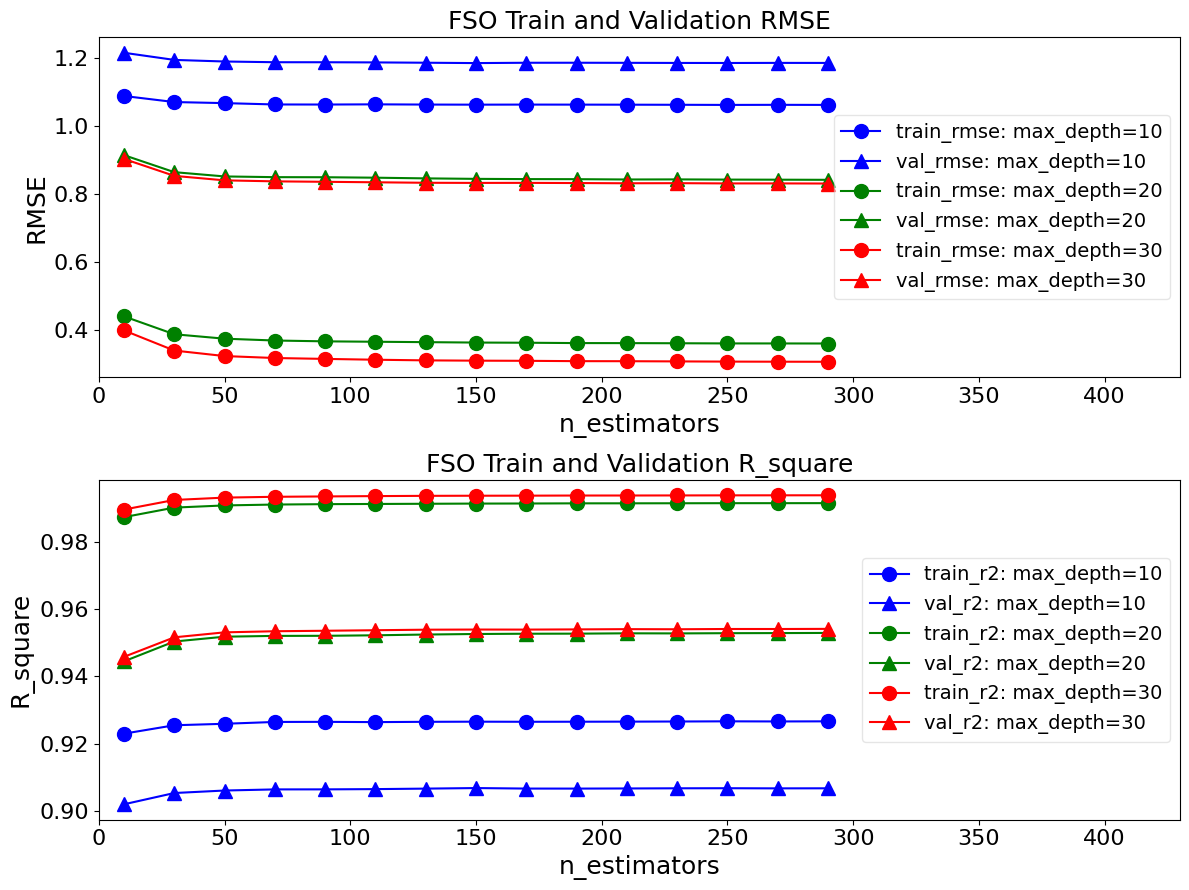

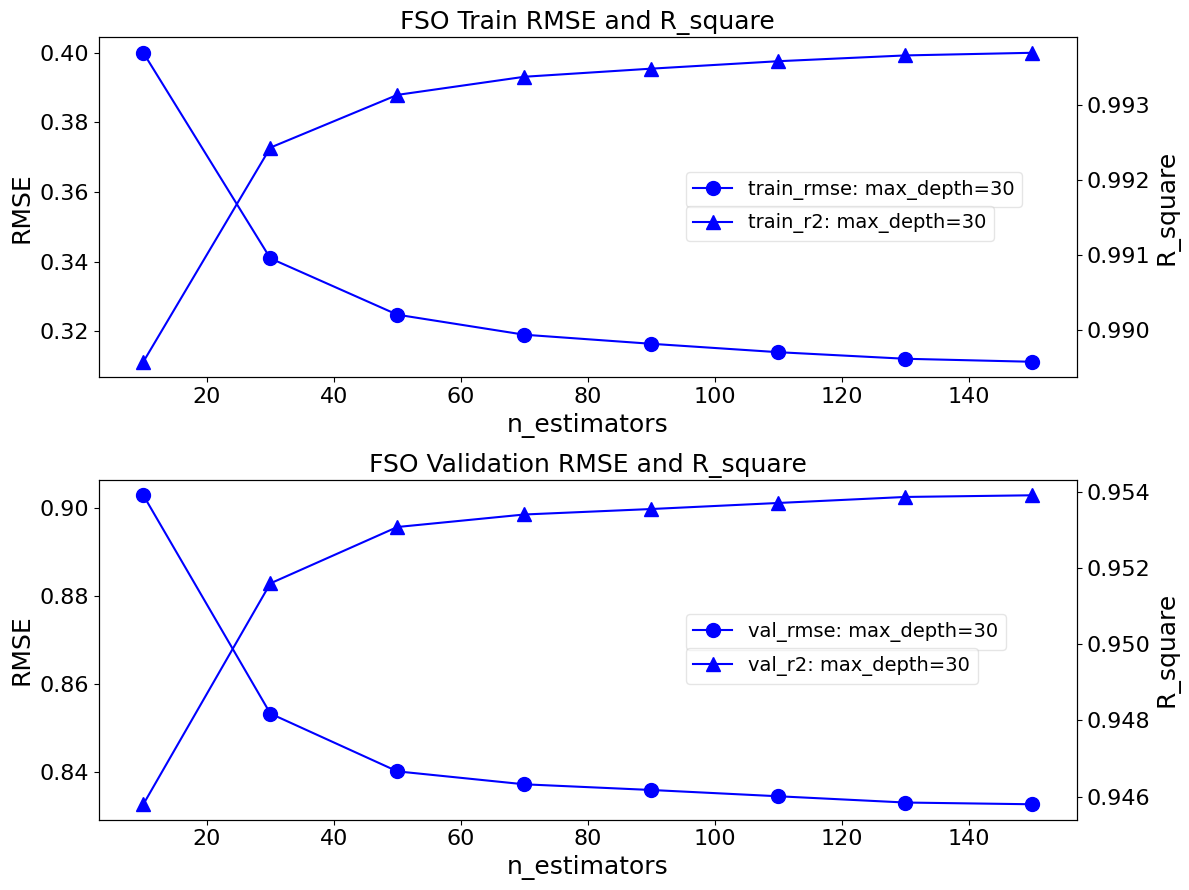

In [ ]:
df = pd.read_csv("results_202403261925_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_FSO.csv")

min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df

select_esti = df[(df['max_depth'] == 30) | (df['max_depth'] == 20) | (df['max_depth'] == 10)]

ModelFunctions.plot_coarse_tuning(select_esti, channel = 'FSO',group_column='max_depth', Xaxis='n_estimators',\
                    metrics='RMSE', metrics1='R_square',legend_loc="right",xlim_s =0,xlim_e=430)

select_esti = df[(df['max_depth'] == 30) & (df['n_estimators'] < 151)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO',lis=[30], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc=(0.6,0.5),legend_loc1=(0.6,0.4))

# FSO fine tunning

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
14           140         32                 1                  2   0.097016   

    train_r2   val_mse   val_r2  
14  0.993682  0.695622  0.95376  
valid_mse best:
   n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
8           140         30                 1                  2   0.097202   

   train_r2   val_mse    val_r2  
8   0.99367  0.693993  0.953868  


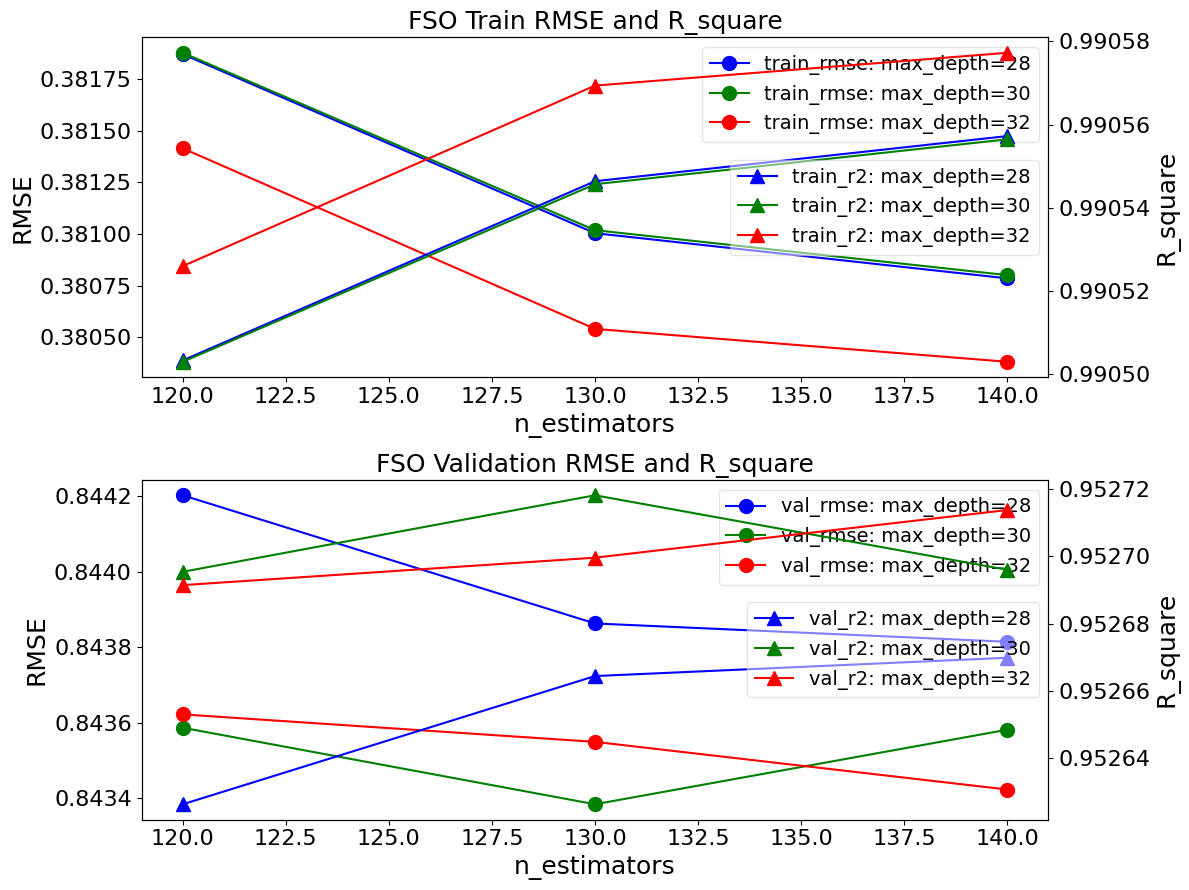

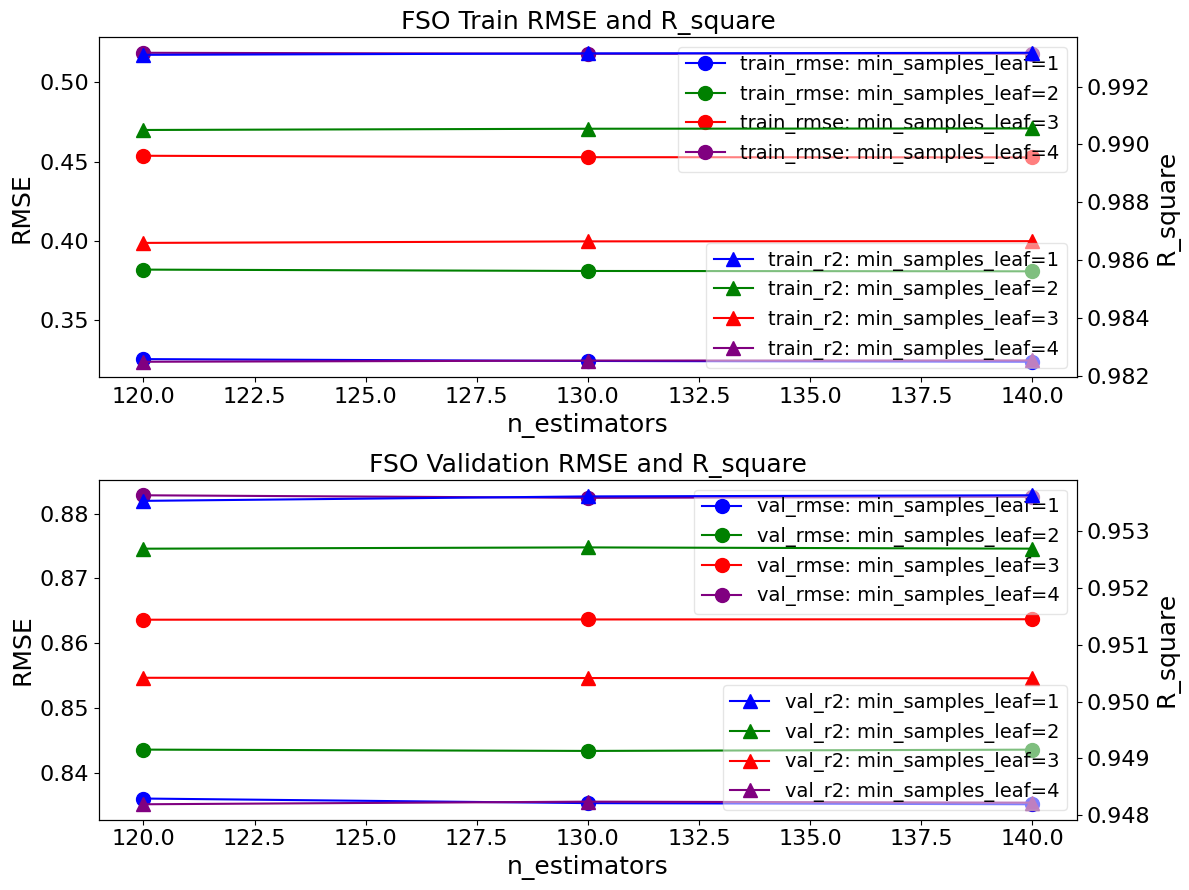

In [ ]:
df1 = pd.read_csv("results_202402230144_n_estimators-120-140-3_max_depth-27-32-6_min_samples_leaf-2-5-4_min_samples_split-2-3-2_RFFSO.csv")
df2 = pd.read_csv('results_202402240942_n_estimators-120-140-3_max_depth-28-32-3_min_samples_leaf-1-1-1_min_samples_split-2-3-2_RF_FSO_compensate.csv')
df = pd.concat([df1,df2],axis = 0)

min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 2) & (df['min_samples_split'] == 3)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO', lis=[28,30,32], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right")

select_esti = df[(df['max_depth'] == 30) & (df['min_samples_split'] == 3)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO',lis=[1,2,3,4], group_column='min_samples_leaf', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="lower right")

# RFL coares tunning

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
89           290         30                 1                  2   0.038258   

    train_r2   val_mse    val_r2  
89  0.996776  0.285571  0.975673  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
66           130         25                 1                  2   0.039881   

    train_r2   val_mse    val_r2  
66  0.996639  0.280065  0.976142  


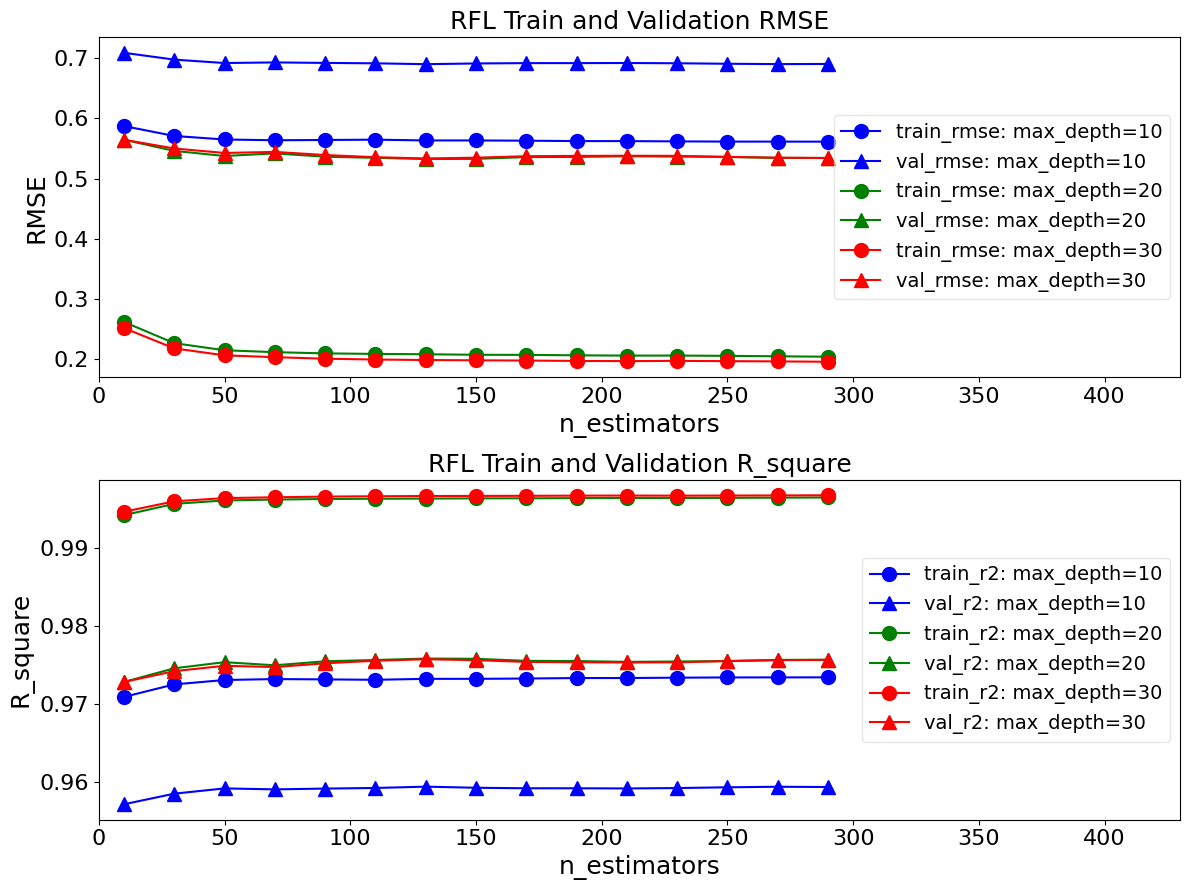

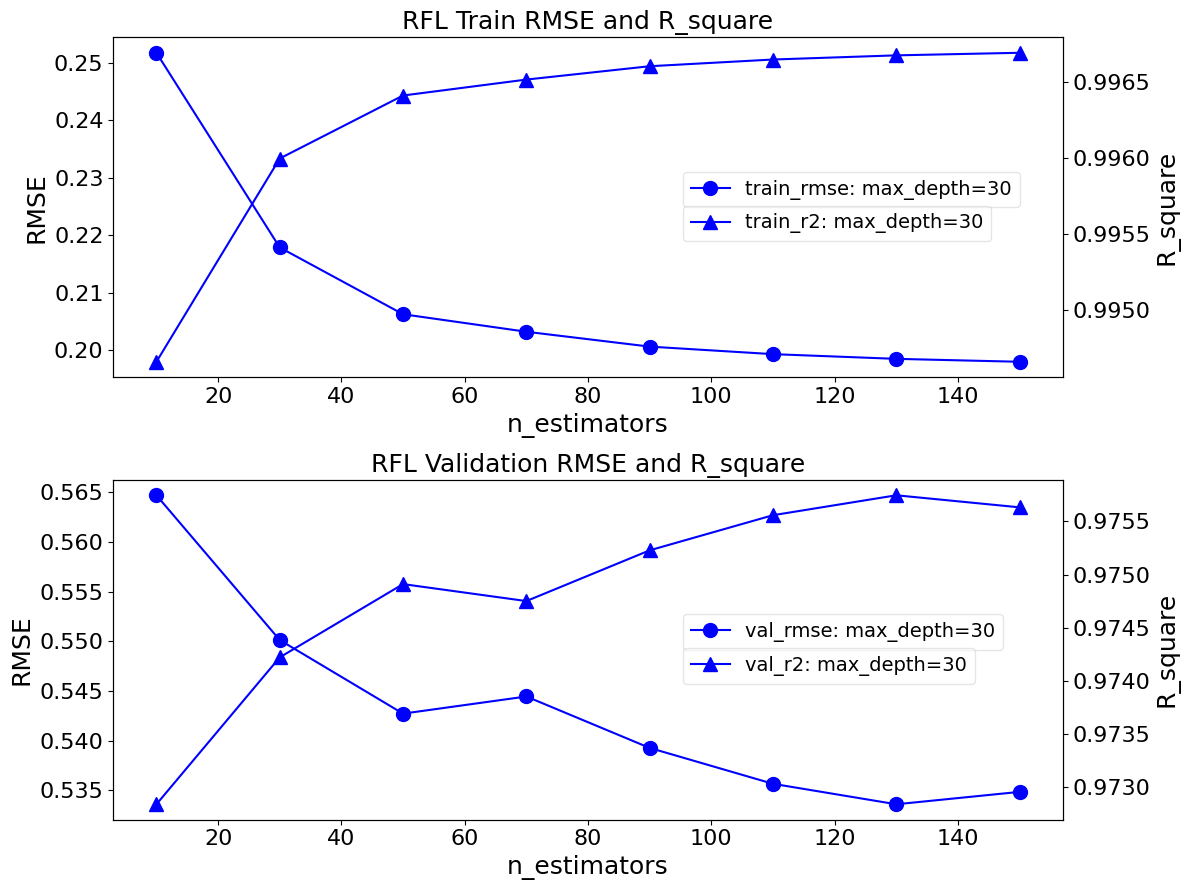

In [ ]:
df = pd.read_csv("results_202403270057_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_RFL.csv")

min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df

select_esti = df[(df['max_depth'] == 30) | (df['max_depth'] == 20) | (df['max_depth'] == 10)]

ModelFunctions.plot_coarse_tuning(select_esti, channel = 'RFL',group_column='max_depth', Xaxis='n_estimators',\
                    metrics='RMSE', metrics1='R_square',legend_loc="right",xlim_s =0,xlim_e=430)

select_esti = df[(df['max_depth'] == 30) & (df['n_estimators'] < 151)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'RFL',lis=[30], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc=(0.6,0.5),legend_loc1=(0.6,0.4))


# RFL fine tunning

In [ ]:
df = pd.read_csv('results_202402240404_n_estimators-100-140-5_max_depth-23-28-6_min_samples_leaf-1-4-4_min_samples_split-2-3-2_RF_rfl.csv')

min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

train_mse best:
     n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
204           140         28                 1                  2   0.039252   

     train_r2   val_mse    val_r2  
204  0.996692  0.283803  0.975824  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
83           130         25                 1                  2   0.039881   

    train_r2   val_mse    val_r2  
83  0.996639  0.280065  0.976142  


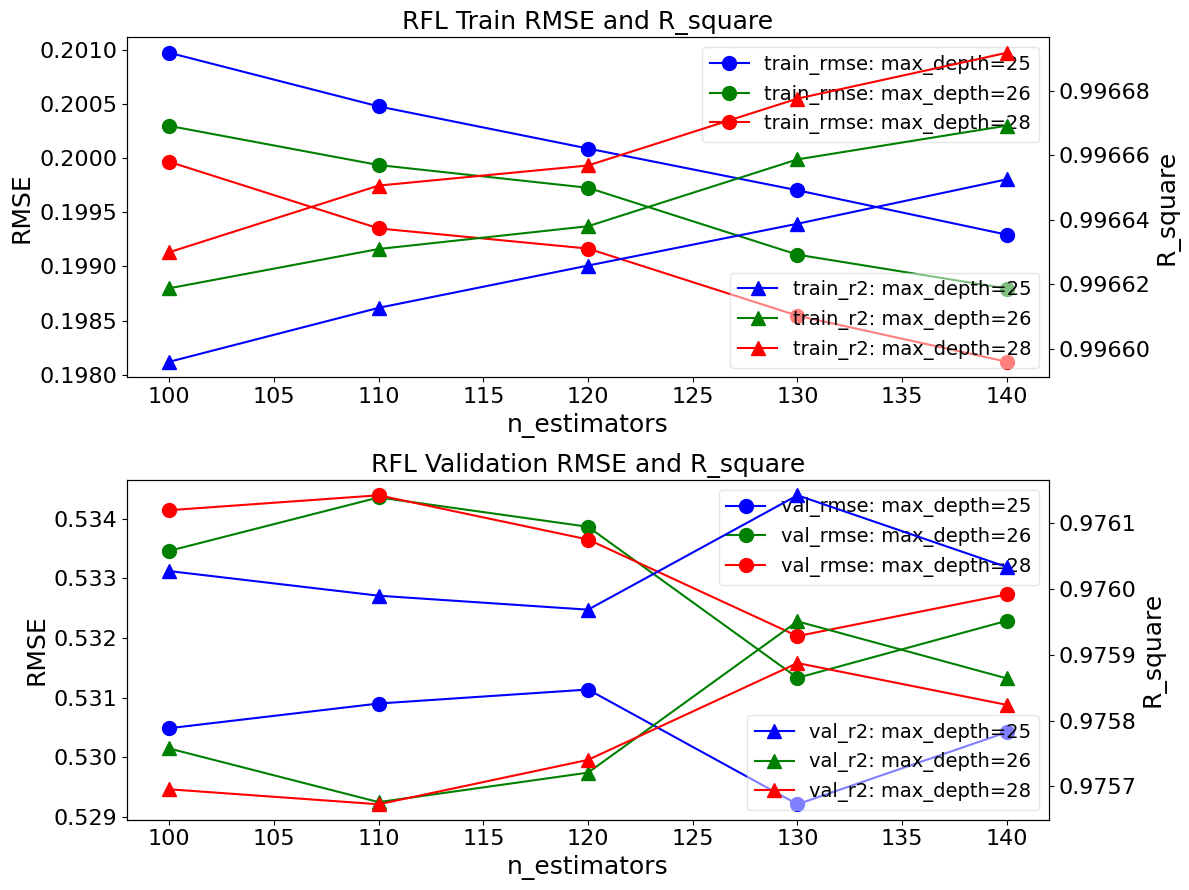

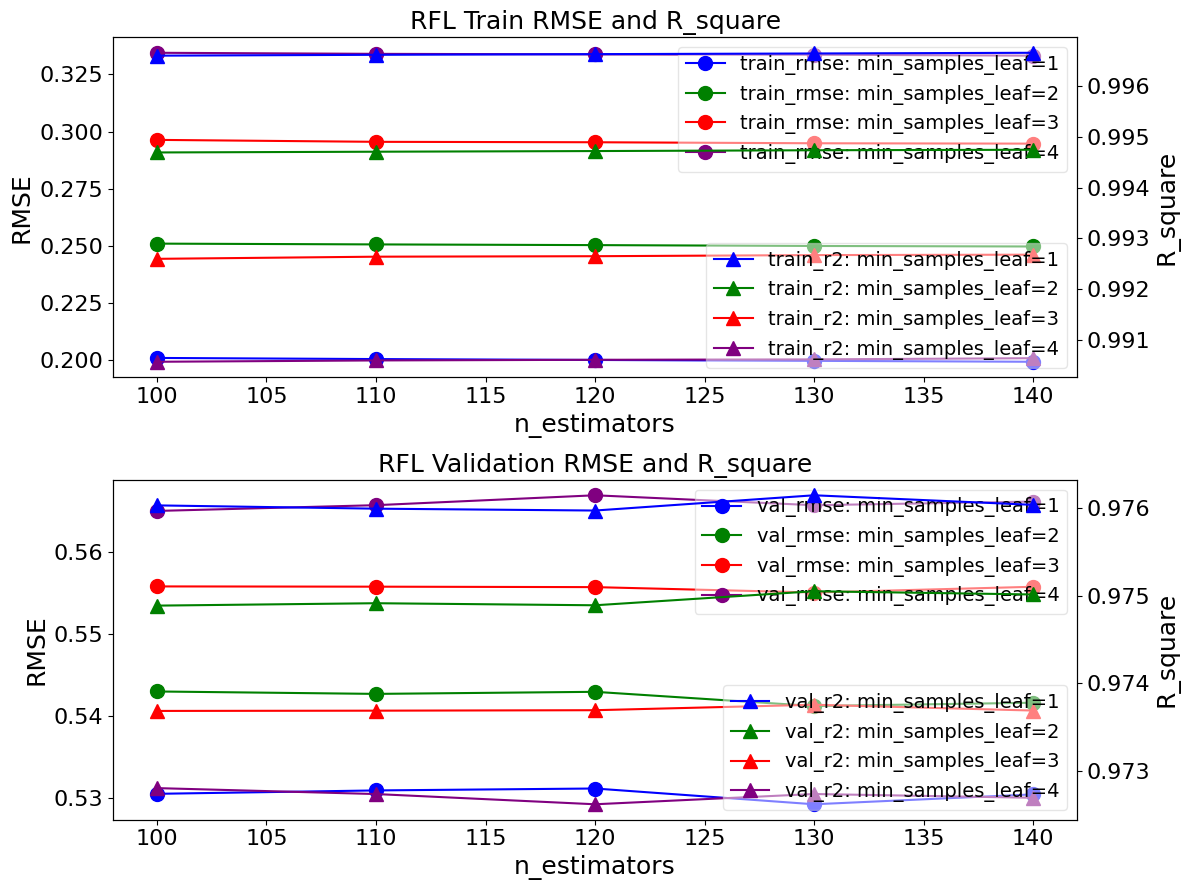

In [ ]:

select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'RFL',lis=[25,26,28], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="lower right")

select_esti = df[(df['max_depth'] == 25) & (df['min_samples_split'] == 2)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'RFL',lis=[1,2,3,4], group_column='min_samples_leaf', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="lower right")

# Explore the feature importance

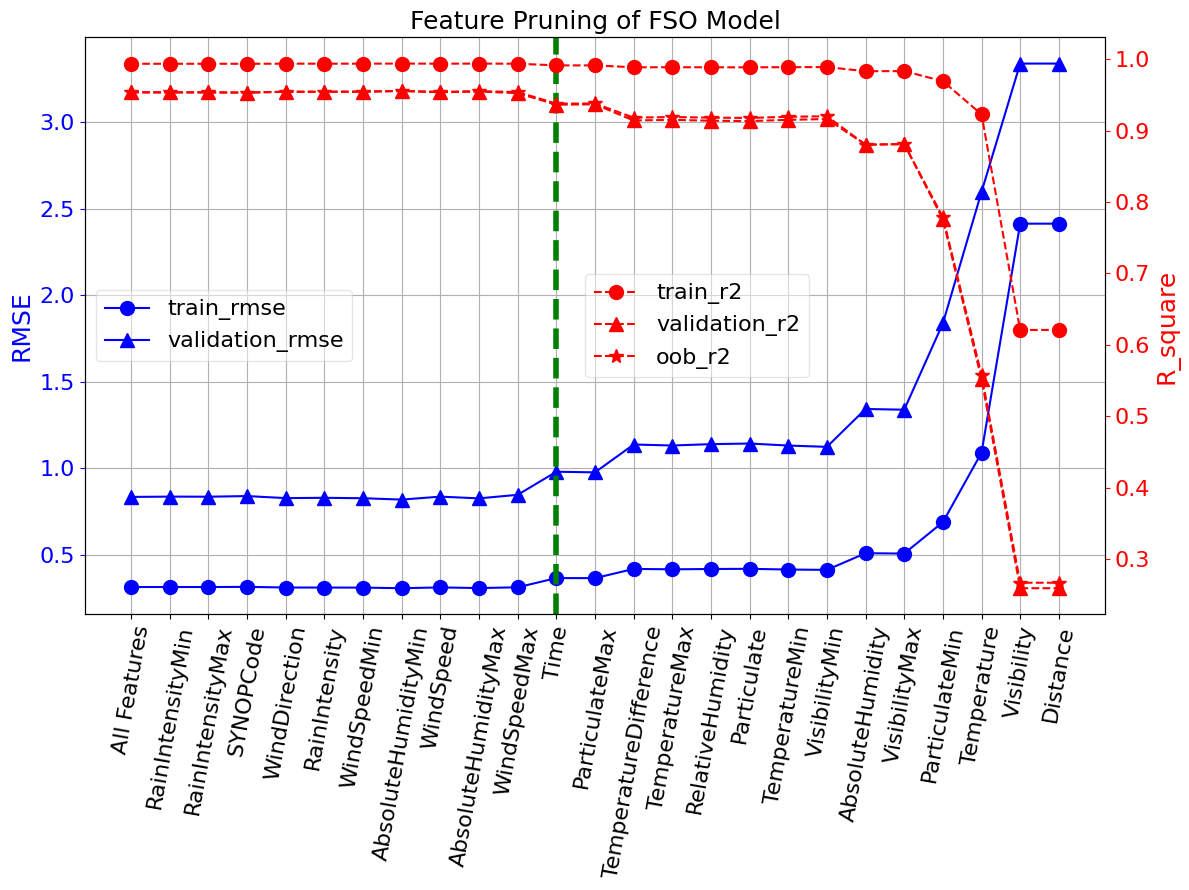

0              All Features
1          RainIntensityMin
2          RainIntensityMax
3                 SYNOPCode
4             WindDirection
5             RainIntensity
6              WindSpeedMin
7       AbsoluteHumidityMin
8                 WindSpeed
9       AbsoluteHumidityMax
10             WindSpeedMax
11                     Time
12           ParticulateMax
13    TemperatureDifference
14           TemperatureMax
15         RelativeHumidity
16              Particulate
17           TemperatureMin
18            VisibilityMin
19         AbsoluteHumidity
20            VisibilityMax
21           ParticulateMin
22              Temperature
23               Visibility
24                 Distance
Name: remove_feature, dtype: object 0     0.312144
1     0.312204
2     0.312020
3     0.313022
4     0.309312
5     0.309055
6     0.308765
7     0.305251
8     0.309857
9     0.306174
10    0.310508
11    0.363867
12    0.363537
13    0.416736
14    0.414566
15    0.416329
16    0.417409
17    0.4

In [7]:
fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )

df = pd.read_csv("FSO_130-30-1-2_feature_importance_wrapple.csv")

ModelFunctions.plot_feature_importance(df, threshold="Time",channel="FSO", 
                                       markersize=10, legend_loc="center left",
                                       legend_loc1="center",legend_x=0.6, legend_y=0.5)

remove_features = df["remove_feature"]
train_rmse = df["train_rmse"]
train_r2 = df["train_r2"]
val_rmse = df["val_rmse"]
val_r2 = df["val_r2"]
oob_r2 = df["oob_r2"]
print(remove_features
,train_rmse 
#,train_r2 = df["train_r2"]
,val_rmse 
#,val_r2 = df["val_r2"]
#oob_r2 = df["oob_r2"]
)

0              All Features
1                 WindSpeed
2             WindDirection
3              WindSpeedMin
4               Particulate
5              WindSpeedMax
6             VisibilityMax
7       AbsoluteHumidityMin
8            TemperatureMin
9                      Time
10           ParticulateMin
11    TemperatureDifference
12      AbsoluteHumidityMax
13            VisibilityMin
14           TemperatureMax
15                Frequency
16         RelativeHumidity
17                SYNOPCode
18               Visibility
19         RainIntensityMin
20           ParticulateMax
21              Temperature
22         RainIntensityMax
23                 Distance
24            RainIntensity
25         AbsoluteHumidity
Name: remove_feature, dtype: object 0     0.199703
1     0.200092
2     0.198029
3     0.197751
4     0.198520
5     0.196996
6     0.196539
7     0.193452
8     0.190258
9     0.205559
10    0.203917
11    0.222193
12    0.220536
13    0.220255
14    0.218072
15    0.284

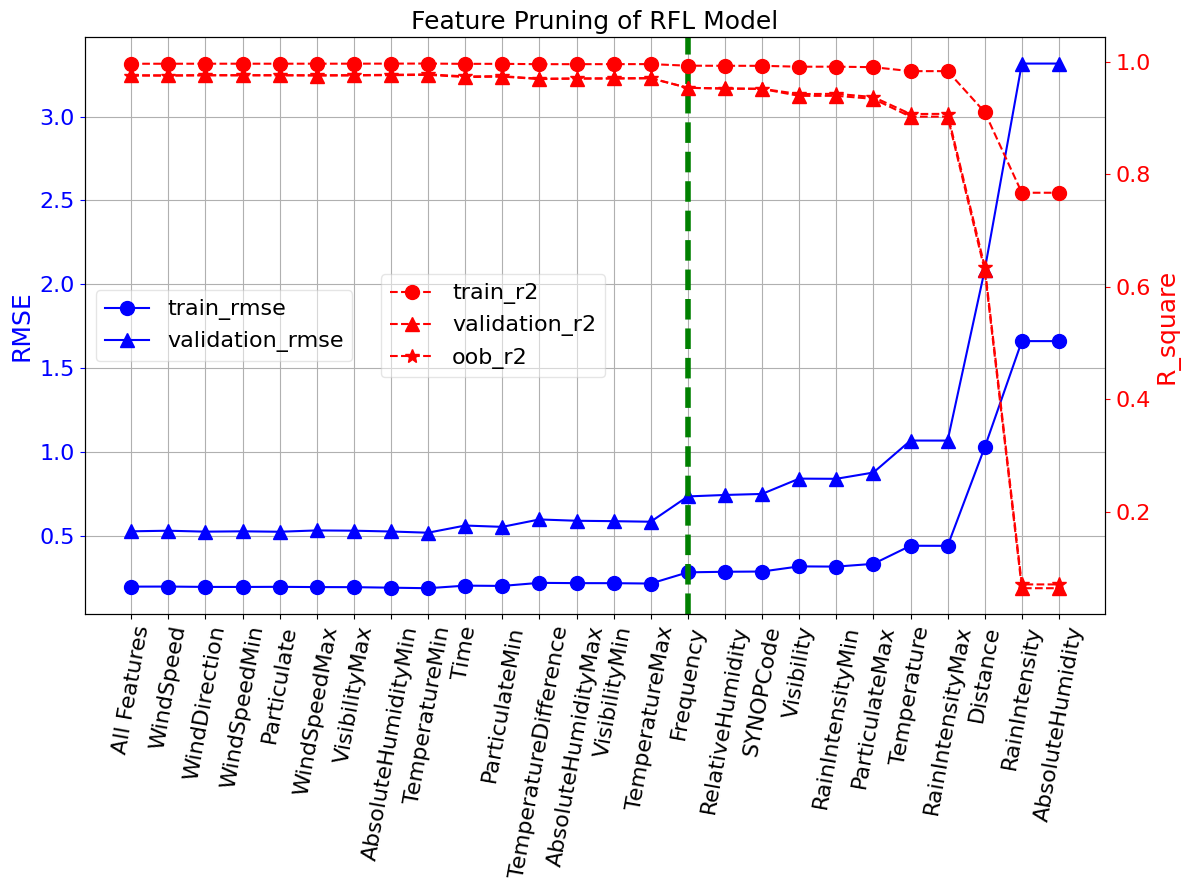

In [10]:
rfl_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=25, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )

df = pd.read_csv("RFL_130-25-1-2_feature_importance_wrapple.csv")
remove_features = df["remove_feature"]
train_rmse = df["train_rmse"]
train_r2 = df["train_r2"]
val_rmse = df["val_rmse"]
val_r2 = df["val_r2"]
oob_r2 = df["oob_r2"]
print(remove_features
,train_rmse 
#,train_r2 = df["train_r2"]
,val_rmse 
#,val_r2 = df["val_r2"]
#oob_r2 = df["oob_r2"]
)
figa_0 = ModelFunctions.plot_feature_importance(df, threshold="Frequency", 
                                                channel="RFL", markersize=10, 
                                                legend_loc="center left", legend_loc1="center",
                                                legend_x=0.4, legend_y=0.5)

# Based on the feature pruning to re-train model.
## FSO rebuilding

In [43]:
def plot_fine_tuning(df, channel= 'FSO', lis=None, group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right",
                            legend_fontsize = 14,legend_x1 = 0, legend_y1 = 0.5,
                            legend_x2 = 0.5, legend_y2 = 0.5,
                            legend_x3 = 0.5, legend_y3 = 0.5,
                            legend_x4 = 0.5, legend_y4 = 0.5,
                            legend_valid = 1
                            ):
    # Group the dataframe by group_column
    grouped = df.groupby(group_column)

    # If lis parameter is provided, only select the interested groups
    if lis:
        grouped = {key: group for key, group in grouped if key in lis}

    # Create the figure
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 9))
    ax2 = ax1.twinx()  # Create the second y-axis, shared with the first subplot
    ax4 = ax3.twinx()
    # Define the color list
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

    # Iterate over each group
    for i, (name, group) in enumerate(grouped.items()):
        color = colors[i % len(colors)]  # Cycle through the color list
        group = group.sort_values(by=Xaxis)
        ax1.plot(group[Xaxis], np.sqrt(group['train_mse']), marker='o', markersize = markersize,color=color, label=f"train_rmse: {group_column}={name}")
        ax2.plot(group[Xaxis], group['train_r2'], marker='^',markersize = markersize, linestyle='-', color=color, label=f"train_r2: {group_column}={name}")

    # Add labels and legend to the first subplot
    ax1.set_xlabel(f'{Xaxis}', fontsize=18)
    ax1.set_ylabel(f'{metrics}', fontsize=18)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.set_title(f'{channel} Train {metrics} and {metrics1}', fontsize=18)
    # Set labels and legend for the second y-axis
    ax2.set_ylabel(f'{metrics1}', fontsize=18)
    ax2.tick_params(axis='y', labelsize=16)


    # Iterate over each group again for the second subplot
    for i, (name, group) in enumerate(grouped.items()):
        color = colors[i % len(colors)]  # Cycle through the color list
        group = group.sort_values(by=Xaxis)
        ax3.plot(group[Xaxis], np.sqrt(group['val_mse']), marker='o', markersize = markersize,color=color, label=f"val_rmse: {group_column}={name}")
        ax4.plot(group[Xaxis], group['val_r2'], marker='^', markersize = markersize,linestyle='-', color=color, label=f"val_r2: {group_column}={name}")

    # Add labels and legend to the second subplot
    ax3.set_xlabel(f'{Xaxis}', fontsize=18)
    ax3.set_ylabel(f'{metrics}', fontsize=18)
    ax3.tick_params(axis='both', labelsize=16)
    ax3.set_title(f'{channel} Validation {metrics} and {metrics1}', fontsize=18)

    # Set labels and legend for the second y-axis
    ax4.set_ylabel(f'{metrics1}', fontsize=18)
    ax4.tick_params(axis='y', labelsize=16)
    if legend_valid == 1:
    #ax1.legend(loc=legend_loc, framealpha=0.5,fontsize = legend_fontsize)
        ax1.legend(loc="center", bbox_to_anchor=(legend_x1, legend_y1), framealpha=0.5, fontsize=16)
        #ax2.legend(loc=legend_loc1, framealpha=0.5,fontsize = legend_fontsize)
        ax2.legend(loc="center", bbox_to_anchor=(legend_x2, legend_y2), framealpha=0.5, fontsize=16)
        #ax3.legend(loc=legend_loc, framealpha=0.5,fontsize = legend_fontsize)
        ax3.legend(loc="center", bbox_to_anchor=(legend_x3, legend_y3), framealpha=0.5, fontsize=16)
        #ax4.legend(loc=legend_loc1, framealpha=0.5,fontsize = legend_fontsize)
        ax4.legend(loc="center", bbox_to_anchor=(legend_x4, legend_y4), framealpha=0.5, fontsize=16)

    plt.tight_layout()

    # Display the plot
    plt.show()


train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
39           190         50                 1                  2   0.094688   

    train_r2   val_mse    val_r2  
39  0.993834  0.711427  0.952709  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
39           190         50                 1                  2   0.094688   

    train_r2   val_mse    val_r2  
39  0.993834  0.711427  0.952709  


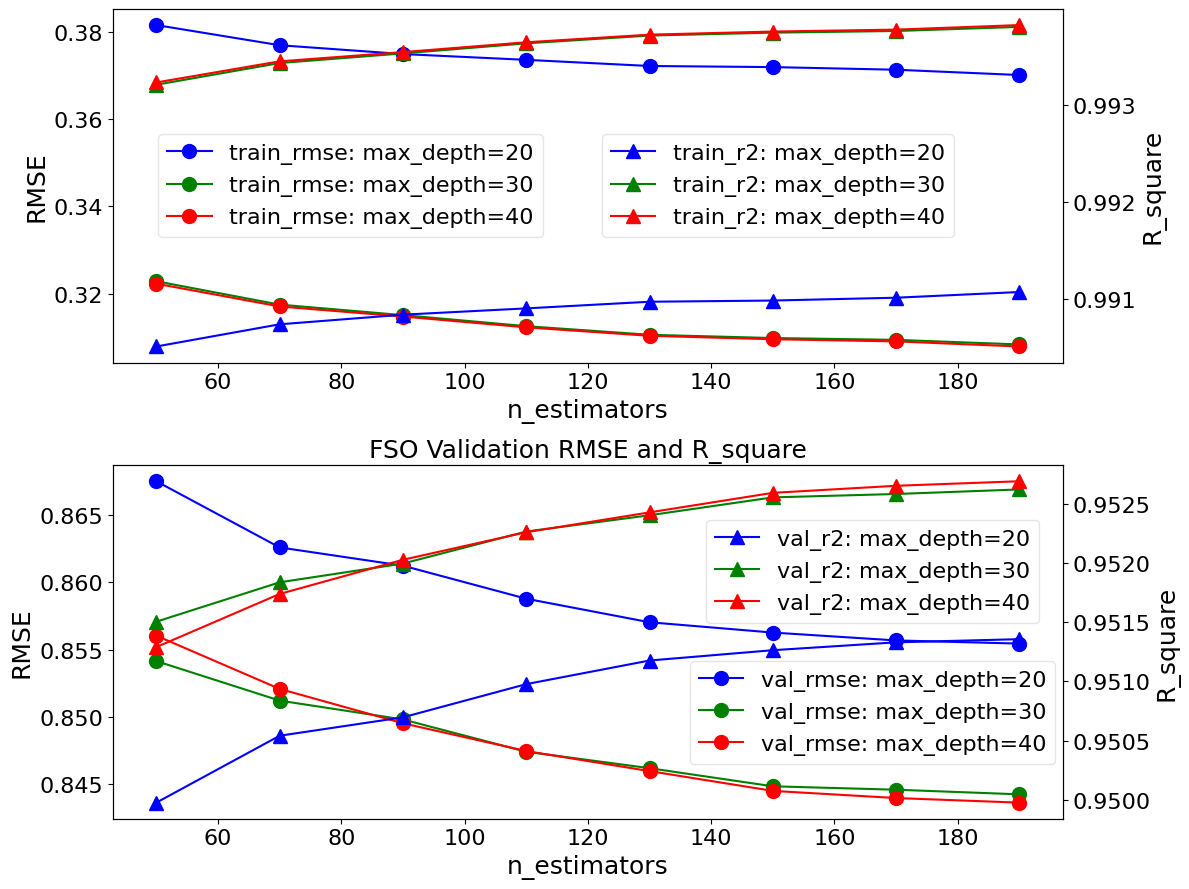

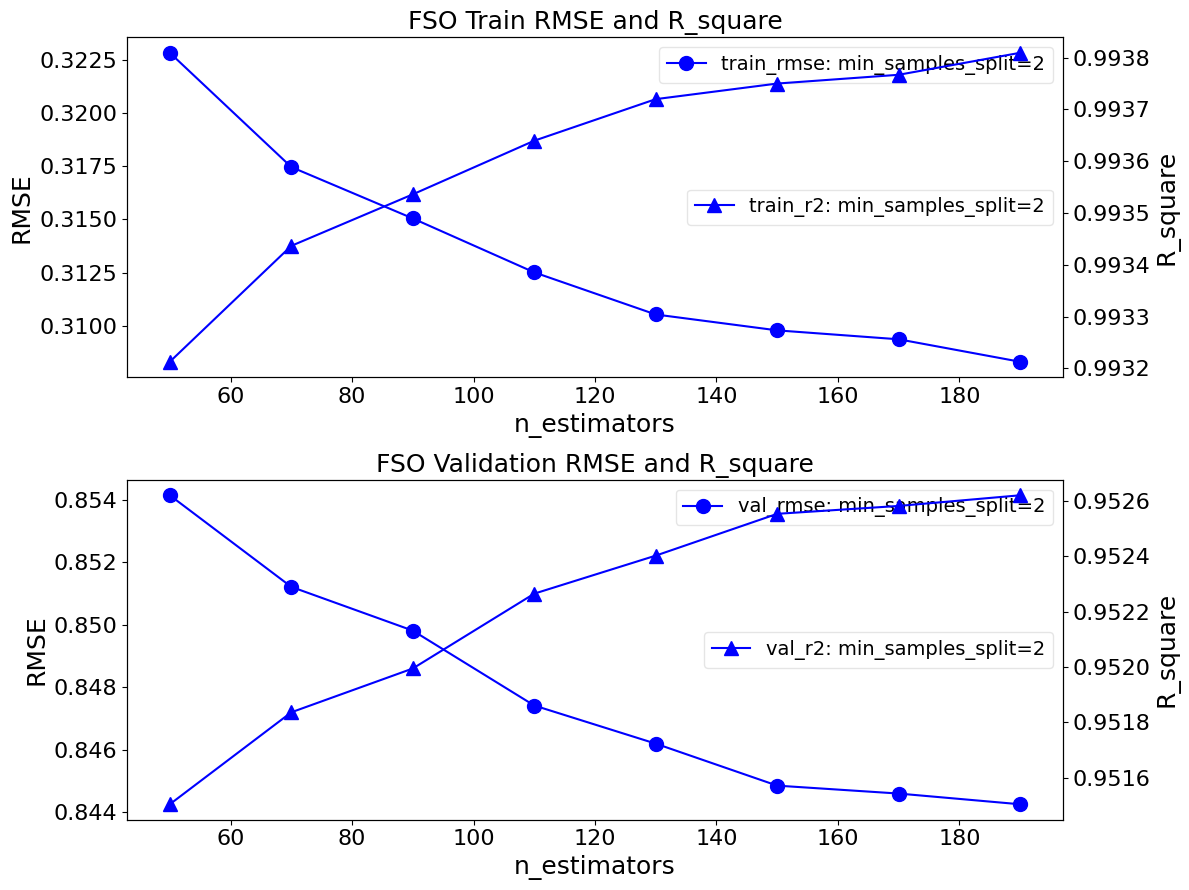

In [39]:
df = pd.read_csv("results_202404060946_n_estimators-50-190-8_max_depth-10-50-5_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_80%_FSO.csv")
#print(df)
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

plot_fine_tuning(select_esti, channel = 'FSO', lis=[20,30,40], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right",
                            legend_x1 = 0.25, legend_y1 = 0.5,
                            legend_x2 = 0.7, legend_y2 = 0.5,
                            legend_x3 = 0.8, legend_y3 = 0.3,
                            legend_x4 = 0.8, legend_y4 = 0.7)
# select_esti = df[(df['min_samples_leaf'] == 2) & (df['min_samples_split'] == 3)]

# ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO', lis=[28,30,32], group_column='max_depth', Xaxis='n_estimators',\
#                             metrics='RMSE', metrics1='R_square',markersize = 10,\
#                             legend_loc="upper right",legend_loc1="right")

select_esti = df[(df['max_depth'] == 30) & (df['min_samples_leaf'] == 1)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO',lis=[2,10,50,100], group_column='min_samples_split', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right")

## fso rebuilt fine tune 

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
19           160         34                 1                  2   0.095607   

    train_r2   val_mse    val_r2  
19  0.993774  0.712394  0.952645  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
19           160         34                 1                  2   0.095607   

    train_r2   val_mse    val_r2  
19  0.993774  0.712394  0.952645  


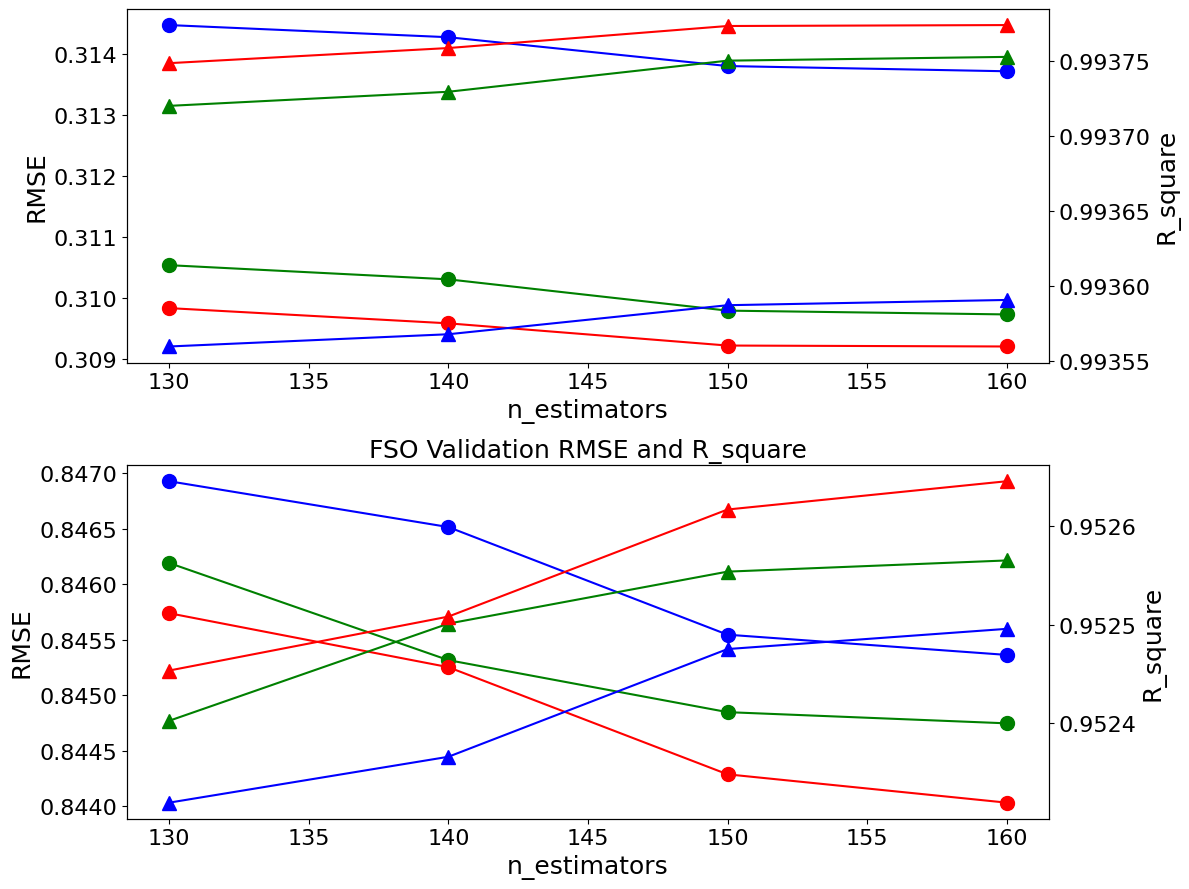

In [36]:
df = pd.read_csv("results_202404061021_n_estimators-130-160-4_max_depth-26-34-5_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_FSO.csv")
#print(df)
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

plot_fine_tuning(select_esti, channel = 'FSO', lis=[26,30,34], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right",
                            legend_x1 = 0.25, legend_y1 = 0.5,
                            legend_x2 = 0.7, legend_y2 = 0.5,
                            legend_x3 = 0.8, legend_y3 = 0.3,
                            legend_x4 = 0.8, legend_y4 = 0.7)
# select_esti = df[(df['min_samples_leaf'] == 2) & (df['min_samples_split'] == 3)]

# ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO', lis=[28,30,32], group_column='max_depth', Xaxis='n_estimators',\
#                             metrics='RMSE', metrics1='R_square',markersize = 10,\
#                             legend_loc="upper right",legend_loc1="right")


## fso rebuilt test 
in the RandomForest.ipynb, it gives the performance of testset.

# RFL rebuilding

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
31           190         40                 1                  2   0.046374   

    train_r2   val_mse    val_r2  
31  0.996091  0.340595  0.970986  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
15           190         20                 1                  2   0.053609   

    train_r2   val_mse    val_r2  
15  0.995482  0.340246  0.971016  


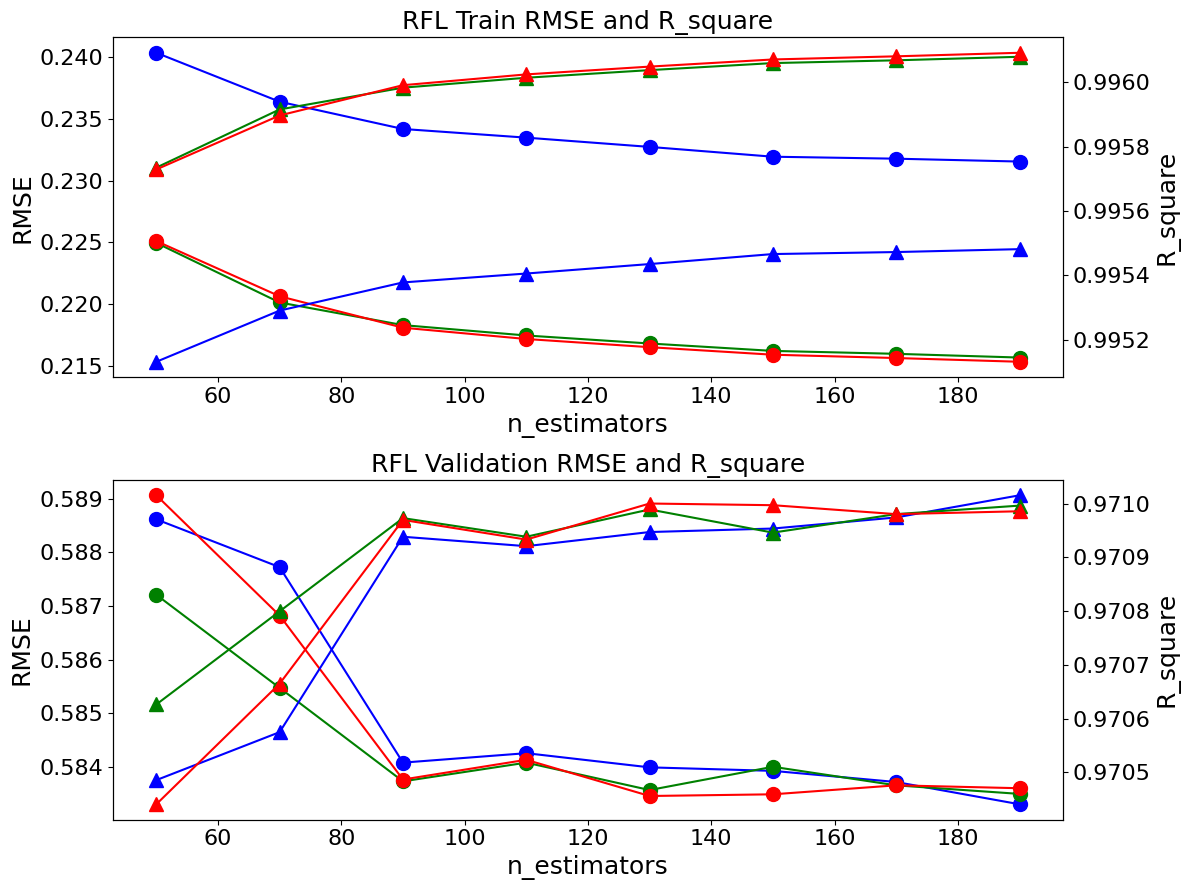

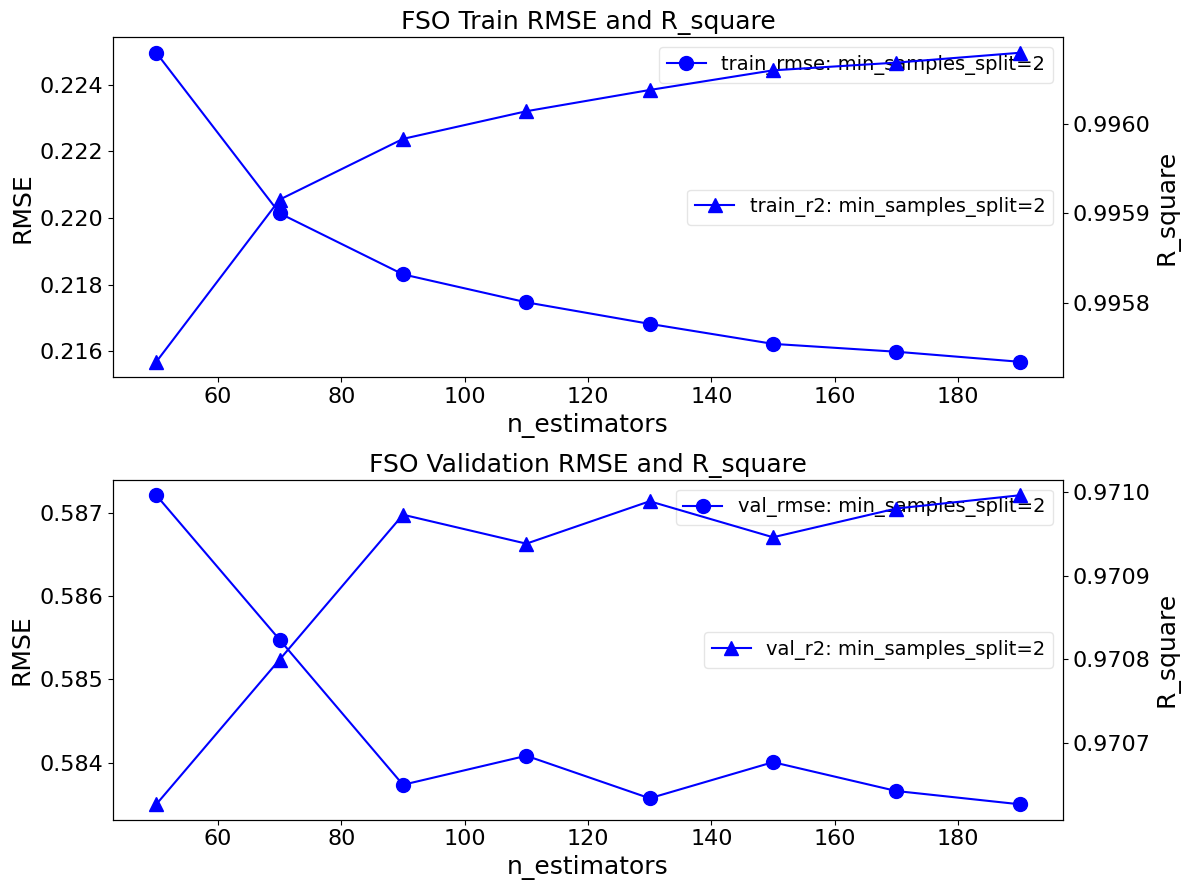

In [44]:
df = pd.read_csv("results_202404061037_n_estimators-50-190-8_max_depth-10-40-4_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_RFL.csv")
#print(df)
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

plot_fine_tuning(select_esti, channel = 'RFL', lis=[20,30,40], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right",
                            legend_x1 = 0.25, legend_y1 = 0.5,
                            legend_x2 = 0.7, legend_y2 = 0.5,
                            legend_x3 = 0.8, legend_y3 = 0.3,
                            legend_x4 = 0.8, legend_y4 = 0.7,
                            legend_valid=0)
# select_esti = df[(df['min_samples_leaf'] == 2) & (df['min_samples_split'] == 3)]

# ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO', lis=[28,30,32], group_column='max_depth', Xaxis='n_estimators',\
#                             metrics='RMSE', metrics1='R_square',markersize = 10,\
#                             legend_loc="upper right",legend_loc1="right")

select_esti = df[(df['max_depth'] == 30) & (df['min_samples_leaf'] == 1)]

ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO',lis=[2,10,50,100], group_column='min_samples_split', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right")

## rfl fine tune

train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
33           140         30                 1                  2   0.046721   

    train_r2   val_mse    val_r2  
33  0.996062  0.341684  0.970893  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
41           150         32                 1                  2    0.04694   

    train_r2   val_mse    val_r2  
41  0.996044  0.339236  0.971102  


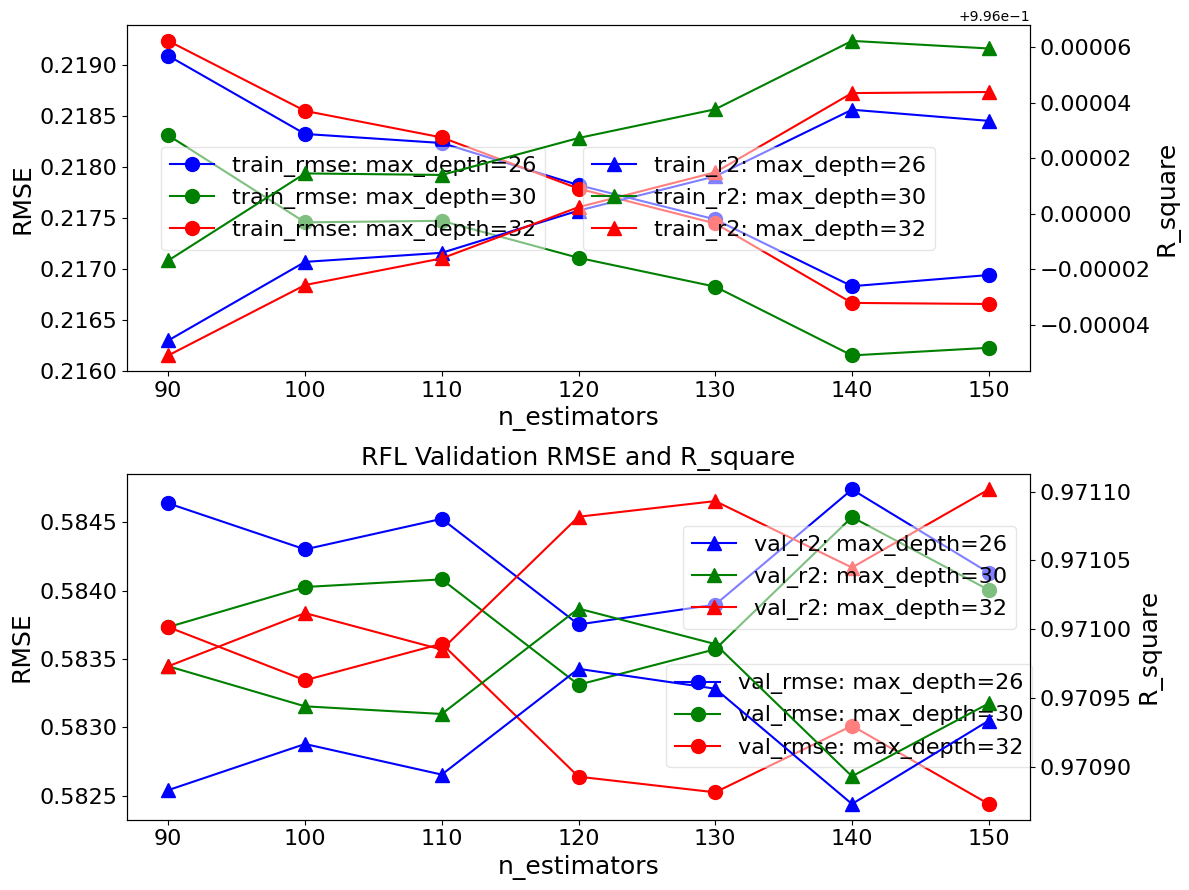

In [40]:
df = pd.read_csv("results_202404061108_n_estimators-90-150-7_max_depth-22-32-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_RFL.csv")
#print(df)
min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

plot_fine_tuning(select_esti, channel = 'RFL', lis=[26,30,32], group_column='max_depth', Xaxis='n_estimators',\
                            metrics='RMSE', metrics1='R_square',markersize = 10,\
                            legend_loc="upper right",legend_loc1="right",
                            legend_x1 = 0.25, legend_y1 = 0.5,
                            legend_x2 = 0.7, legend_y2 = 0.5,
                            legend_x3 = 0.8, legend_y3 = 0.3,
                            legend_x4 = 0.8, legend_y4 = 0.7)

## RFL rebuilt test 
in the RandomForest.ipynb, it gives the performance of testset.

# based on synopcode

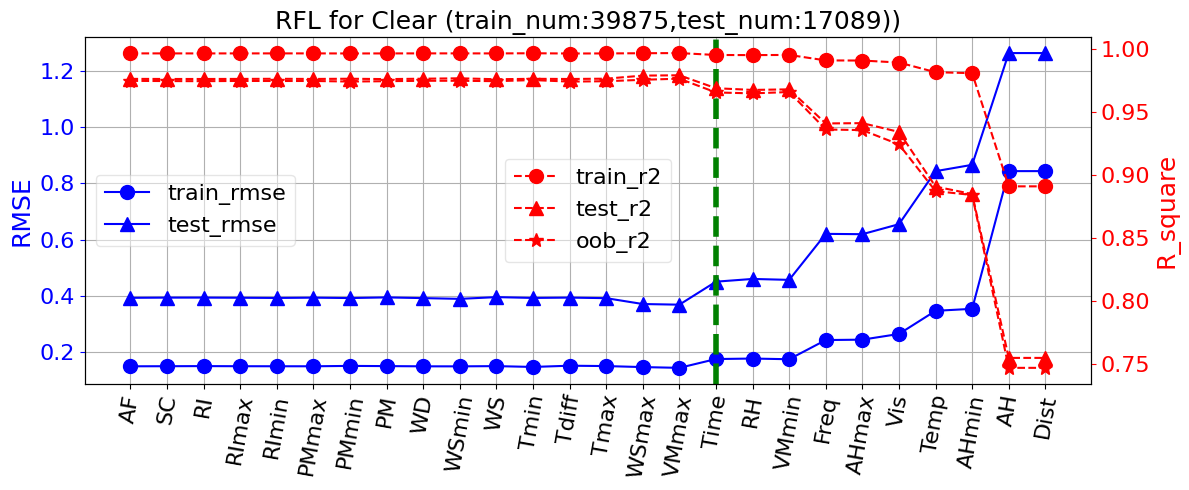

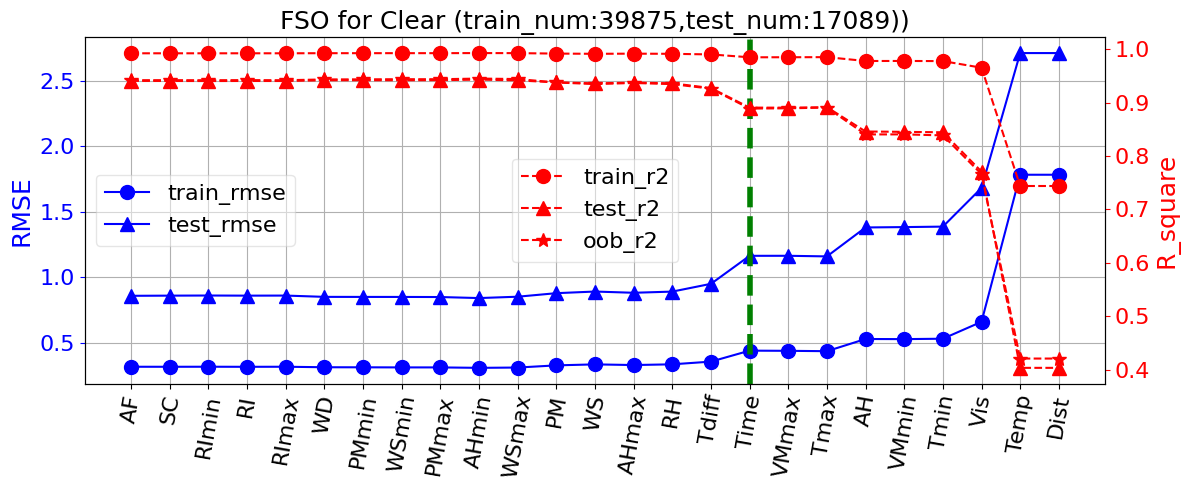

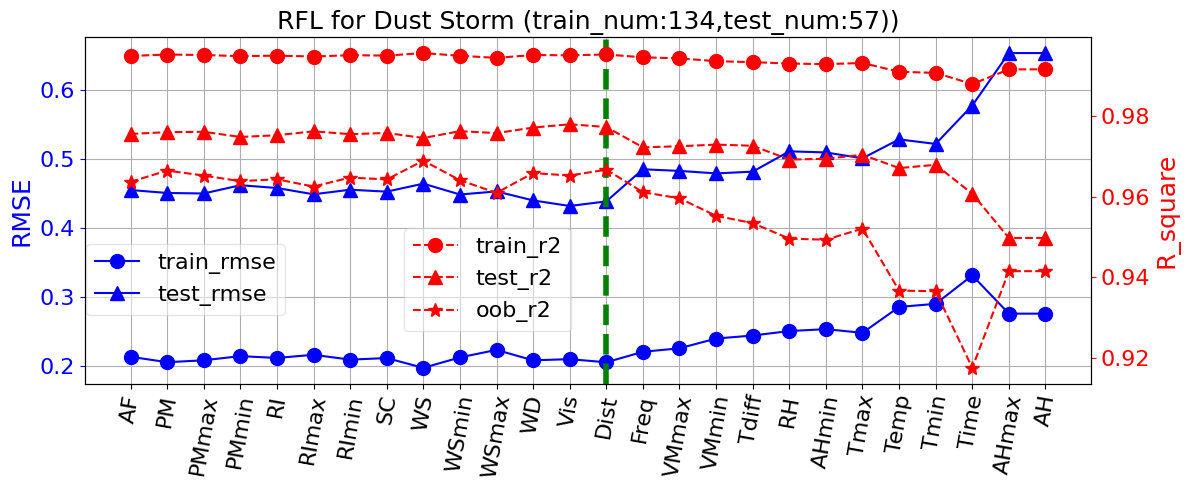

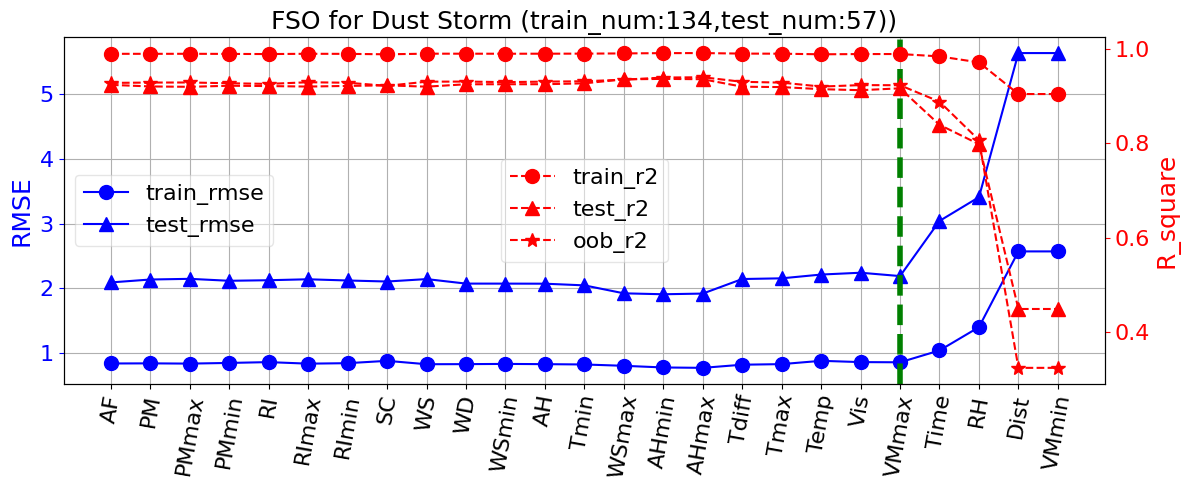

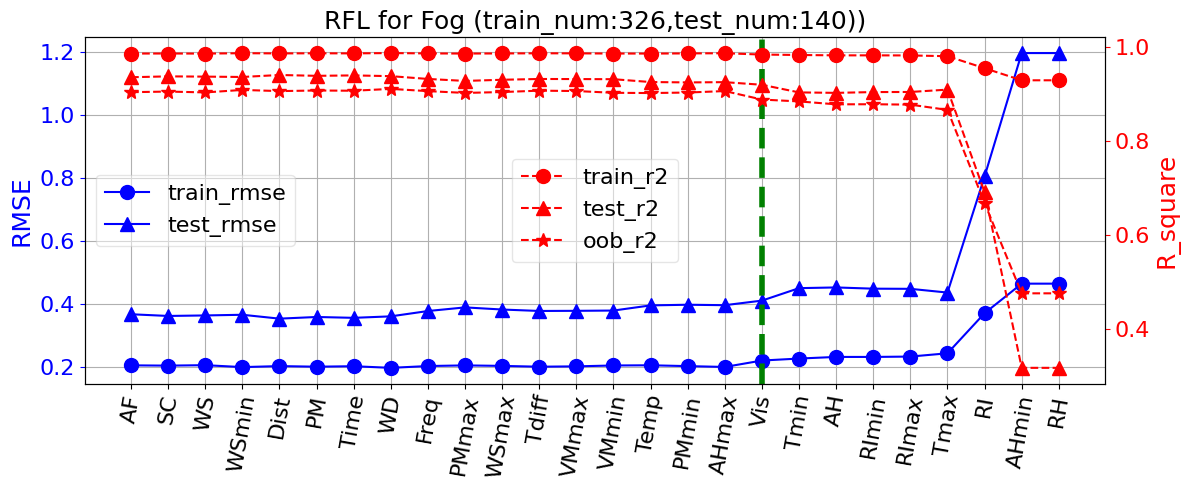

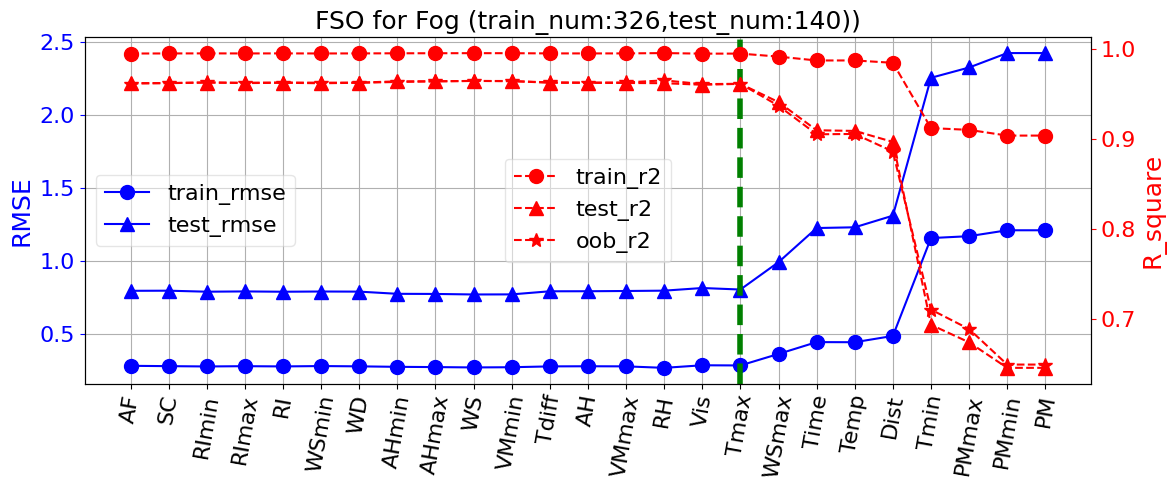

           remove_feature  train_rmse  train_r2  val_rmse    val_r2    oob_r2  \
0            All Features    0.238935  0.993093  0.562475  0.962181  0.949547   
1               SYNOPCode    0.238466  0.993120  0.564647  0.961888  0.949635   
2           WindDirection    0.236732  0.993219  0.556690  0.962955  0.950263   
3               WindSpeed    0.236432  0.993237  0.554983  0.963182  0.950499   
4            WindSpeedMax    0.235667  0.993280  0.552239  0.963545  0.950766   
5          TemperatureMin    0.234209  0.993363  0.547729  0.964138  0.951201   
6            WindSpeedMin    0.232784  0.993444  0.549701  0.963879  0.951771   
7           VisibilityMax    0.232322  0.993470  0.546717  0.964270  0.952097   
8             Particulate    0.231938  0.993491  0.542031  0.964880  0.952278   
9          TemperatureMax    0.230027  0.993598  0.542976  0.964758  0.953085   
10         ParticulateMax    0.228817  0.993665  0.538725  0.965307  0.953592   
11          VisibilityMin   

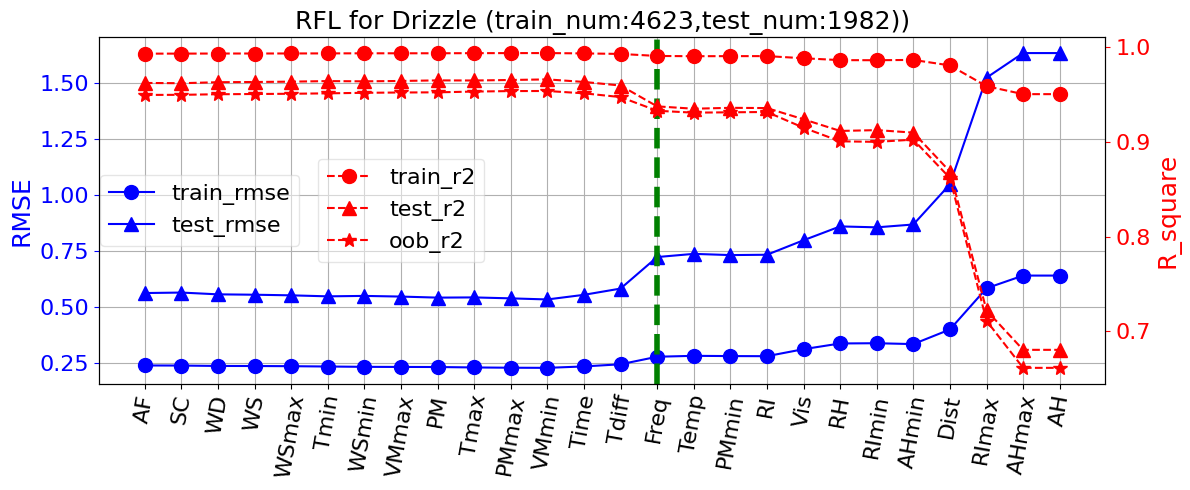

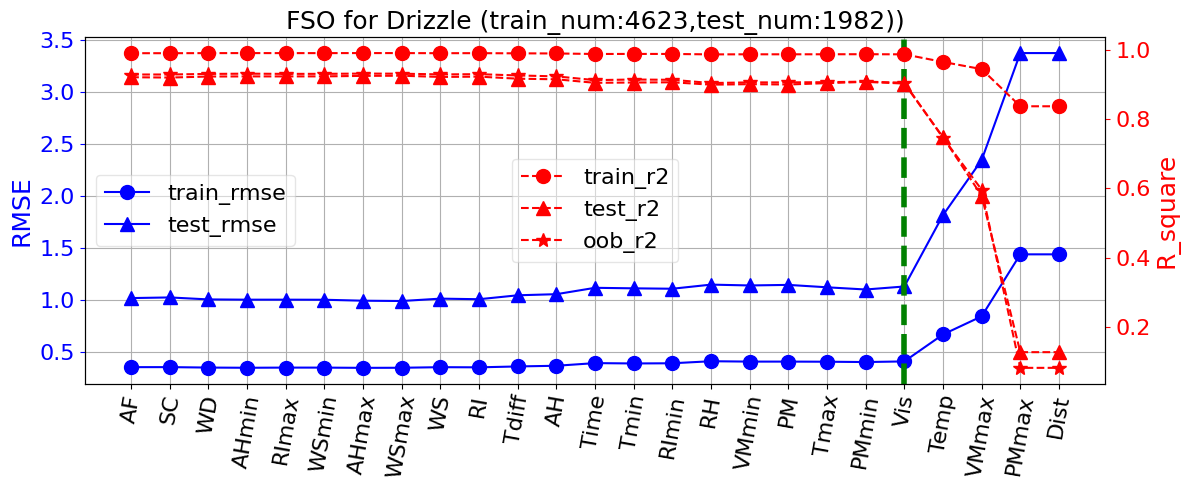

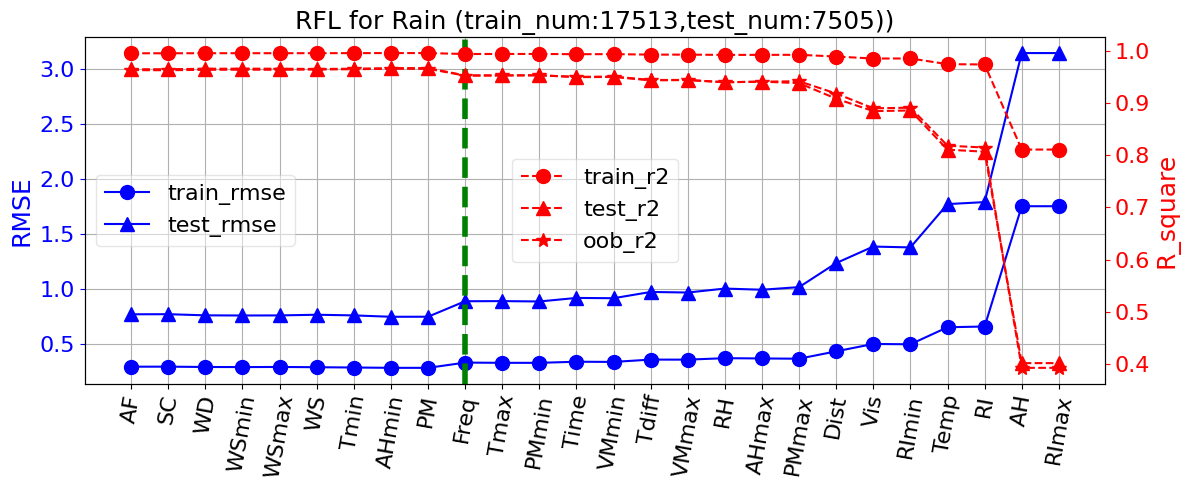

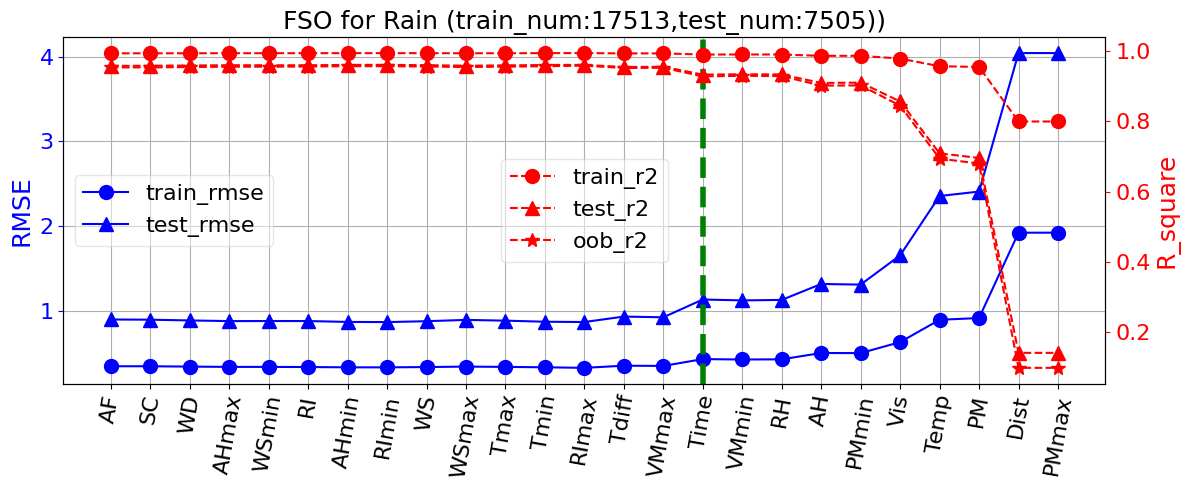

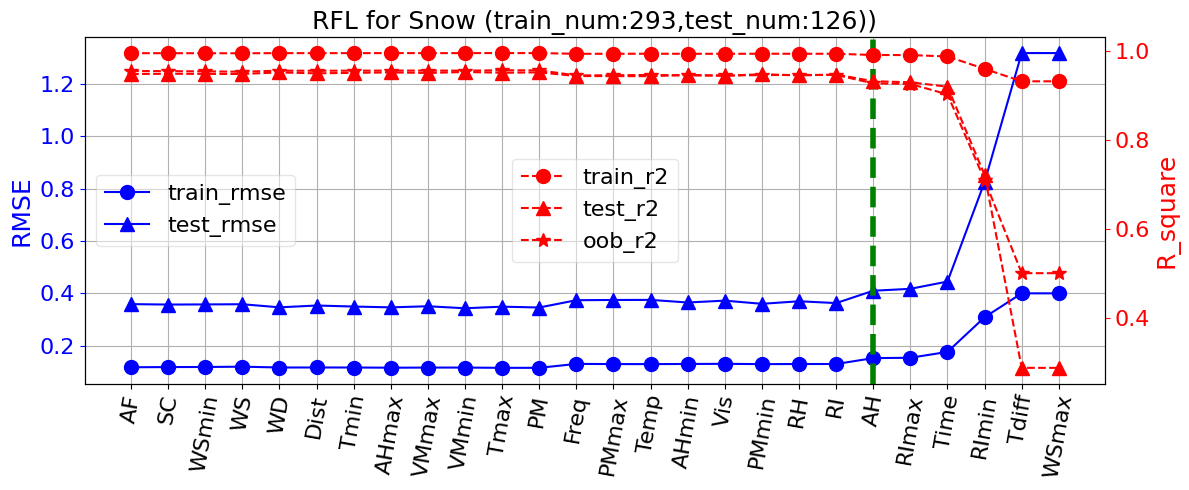

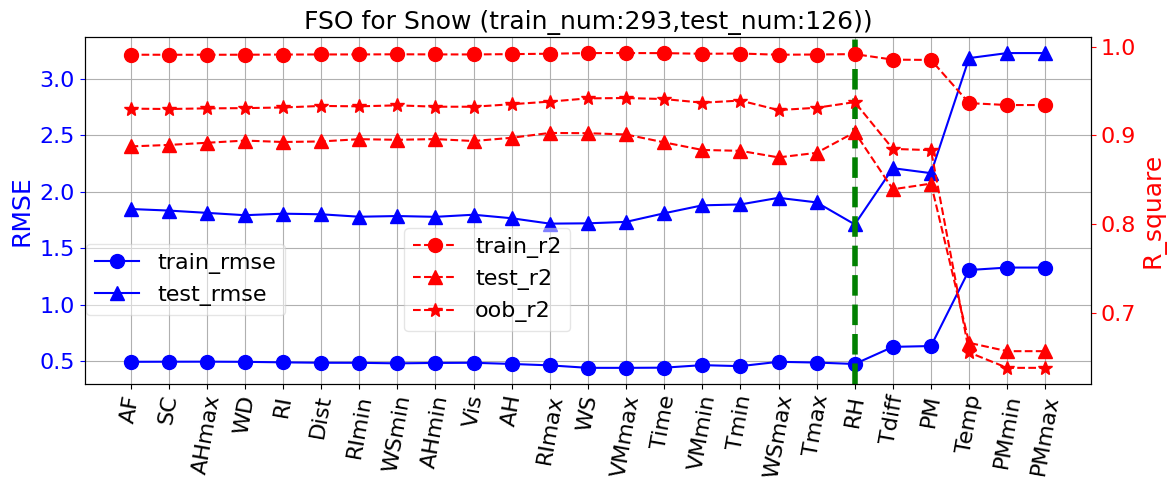

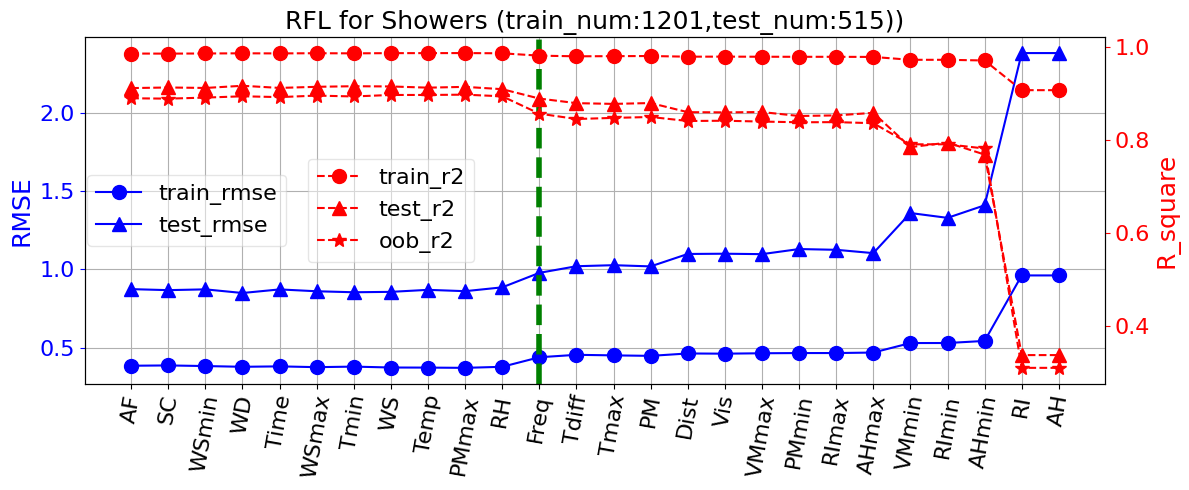

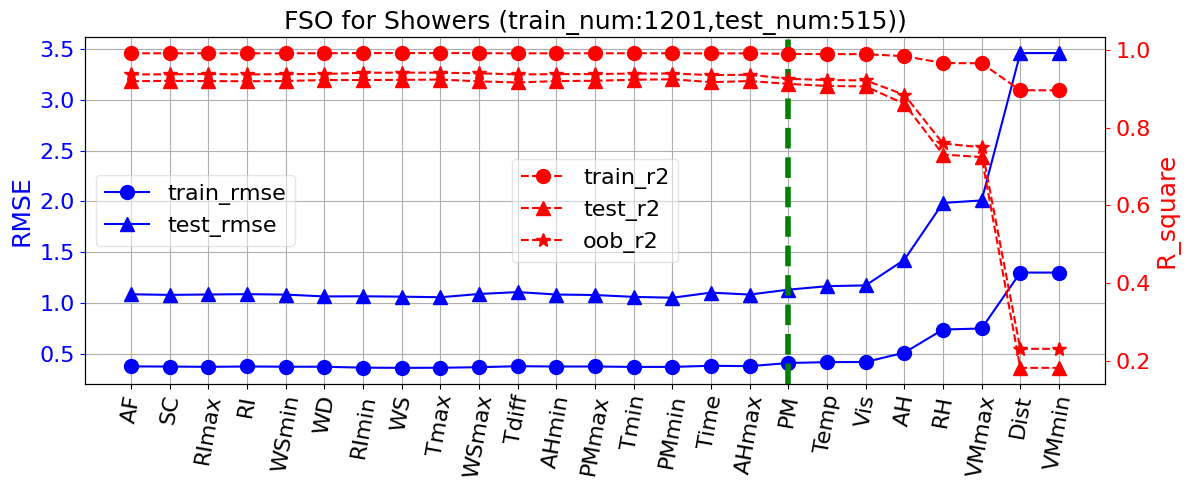

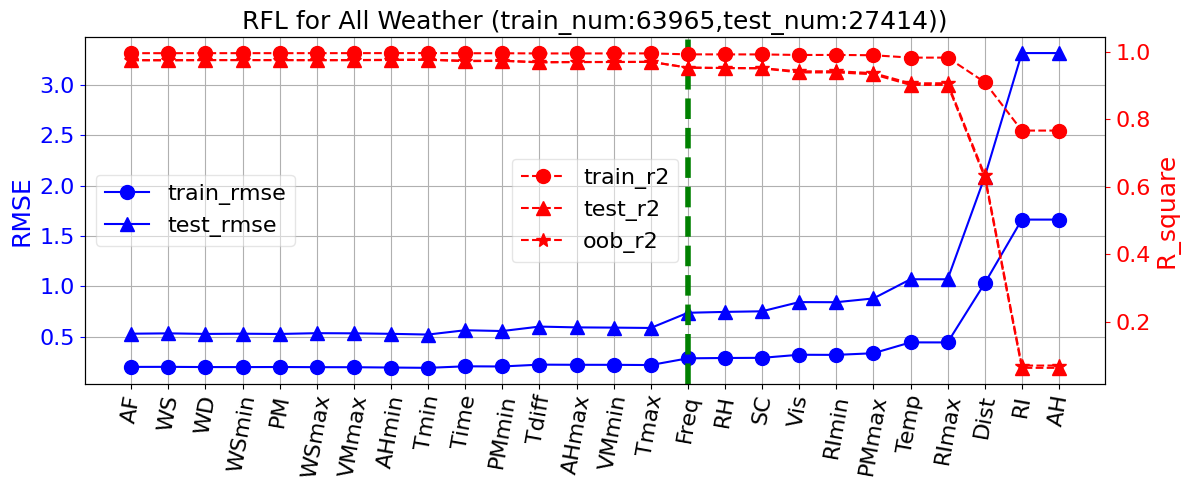

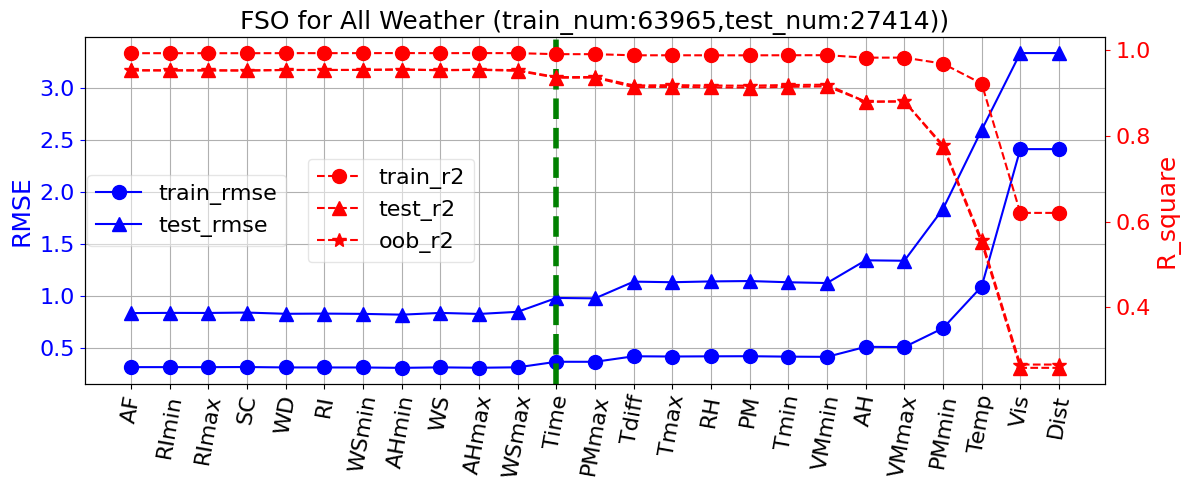

In [23]:
weather_list = ["Clear","Dust Storm","Fog","Drizzle","Rain","Snow","Showers"]
RFL_generic_rmse_list = []
RFL_specific_rmse_list = []
RFL_generic_r2_list = []
RFL_specific_r2_list = []
FSO_generic_rmse_list = []
FSO_specific_rmse_list = []
FSO_generic_r2_list = []
FSO_specific_r2_list = []
 #["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
########### SYNOPCode 0 #################################################
df= pd.read_csv("rfl_synopcode0_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-11]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-11]['val_r2'])
fig0_1= ModelFunctions.plot_feature_importance_code(df, code = 0,threshold="Time", 
                                                    channel="RFL", markersize=10, 
                                                    legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode0_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-10]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-10]['val_r2'])
fig0_2= ModelFunctions.plot_feature_importance_code(df, code = 0,threshold="Time", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

########### SYNOPCode 3 #################################################
df= pd.read_csv("rfl_synopcode3_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-13]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-13]['val_r2'])
fig3_1= ModelFunctions.plot_feature_importance_code(df, code = 3,threshold="Dist", channel="RFL", 
                                                    markersize=10, legend_loc="center left", 
                                                    legend_loc1="center",legend_valid = 1,
                                                    legend_x1 = 0.1,legend_y1= 0.3,
                                                    legend_x2=0.4,legend_y2=0.3)

df = pd.read_csv("FSO_synopcode3_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-6]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-6]['val_r2'])
fig3_2= ModelFunctions.plot_feature_importance_code(df, code = 3,threshold="VMmax", 
                                                    channel="FSO", markersize=10,
                                                    legend_loc="center left", legend_loc1="center" 
                                                    )

########### SYNOPCode 4 #################################################
df= pd.read_csv("rfl_synopcode4_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-10]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-10]['val_r2'])
fig4_1= ModelFunctions.plot_feature_importance_code(df, code = 4,threshold="Vis", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode4_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-10]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-10]['val_r2'])
fig4_2= ModelFunctions.plot_feature_importance_code(df, code = 4,threshold="Tmax", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

########### SYNOPCode 5 #################################################
df= pd.read_csv("rfl_synopcode5_130-25-1-2_feature_importance_wrapple.csv")
print(df)
RFL_specific_rmse_list.append(df.iloc[-13]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-13]['val_r2'])
fig5_1= ModelFunctions.plot_feature_importance_code(df, code = 5,threshold="Freq", 
                                                    channel="RFL", markersize=10, 
                                                    legend_loc="center left", legend_loc1="center",
                                                    legend_valid = 1,
                                                    legend_x1 = 0.1,legend_y1= 0.5,
                                                    legend_x2=0.3,legend_y2=0.5)

df = pd.read_csv("FSO_synopcode5_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-6]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-6]['val_r2'])
fig5_2= ModelFunctions.plot_feature_importance_code(df, code = 5,threshold="Vis", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

########## SYNOPCode 6 #################################################
df= pd.read_csv("rfl_synopcode6_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-17]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-17]['val_r2'])
fig6_1= ModelFunctions.plot_feature_importance_code(df, code = 6,threshold="Freq", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode6_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-11]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-11]['val_r2'])
fig6_2= ModelFunctions.plot_feature_importance_code(df, code = 6,threshold="Time", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

########## SYNOPCode 7 #################################################
df= pd.read_csv("rfl_synopcode7_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-7]['val_r2'])
fig7_1= ModelFunctions.plot_feature_importance_code(df, code = 7,threshold="AH", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_synopcode7_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-7]['val_r2'])
fig7_2= ModelFunctions.plot_feature_importance_code(df, code = 7,threshold="RH", channel="FSO", 
                                                    markersize=10, legend_loc="center left", 
                                                    legend_loc1="center",legend_valid = 1,
                                                    legend_x1 = 0.1,legend_y1= 0.3,
                                                    legend_x2=0.4, legend_y2=0.3)

########### SYNOPCode 8 #################################################
df = pd.read_csv("rfl_synopcode8_130-25-1-2_feature_importance_wrapple.csv")
RFL_specific_rmse_list.append(df.iloc[-16]['val_rmse'])
RFL_specific_r2_list.append(df.iloc[-16]['val_r2'])
fig8_1= ModelFunctions.plot_feature_importance_code(df, code = 8,threshold="Freq", channel="RFL",
                                                     markersize=10, legend_loc="center left", 
                                                     legend_loc1="center",legend_valid = 1,
                                                    legend_x1 = 0.1,legend_y1= 0.5,
                                                    legend_x2=0.3, legend_y2=0.5)

df = pd.read_csv("FSO_synopcode8_130-30-1-2_feature_importance_wrapple.csv")
FSO_specific_rmse_list.append(df.iloc[-9]['val_rmse'])
FSO_specific_r2_list.append(df.iloc[-9]['val_r2'])
fig8_2= ModelFunctions.plot_feature_importance_code(df, code = 8,threshold="PM", channel="FSO", markersize=10, legend_loc="center left", legend_loc1="center")

########### All weather #################################################
df = pd.read_csv("RFL_130-25-1-2_feature_importance_wrapple.csv")
# RFL_specific_rmse_list.append(df.iloc[-7]['val_rmse'])
# RFL_specific_r2_list.append(df.iloc[-7]['val_r2'])
figa_1= ModelFunctions.plot_feature_importance_code(df, code = 9,threshold="Freq", channel="RFL", markersize=10, legend_loc="center left", legend_loc1="center")

df = pd.read_csv("FSO_130-30-1-2_feature_importance_wrapple.csv")
# FSO_specific_rmse_list.append(df.iloc[-8]['val_rmse'])
# FSO_specific_r2_list.append(df.iloc[-8]['val_r2'])
figa_2= ModelFunctions.plot_feature_importance_code(df, code = 9,threshold="Time", channel="FSO",
                                                     markersize=10, legend_loc="center left", 
                                                     legend_loc1="center",legend_valid = 1,
                                                    legend_x1 = 0.1,legend_y1= 0.5,
                                                    legend_x2=0.3, legend_y2=0.5)


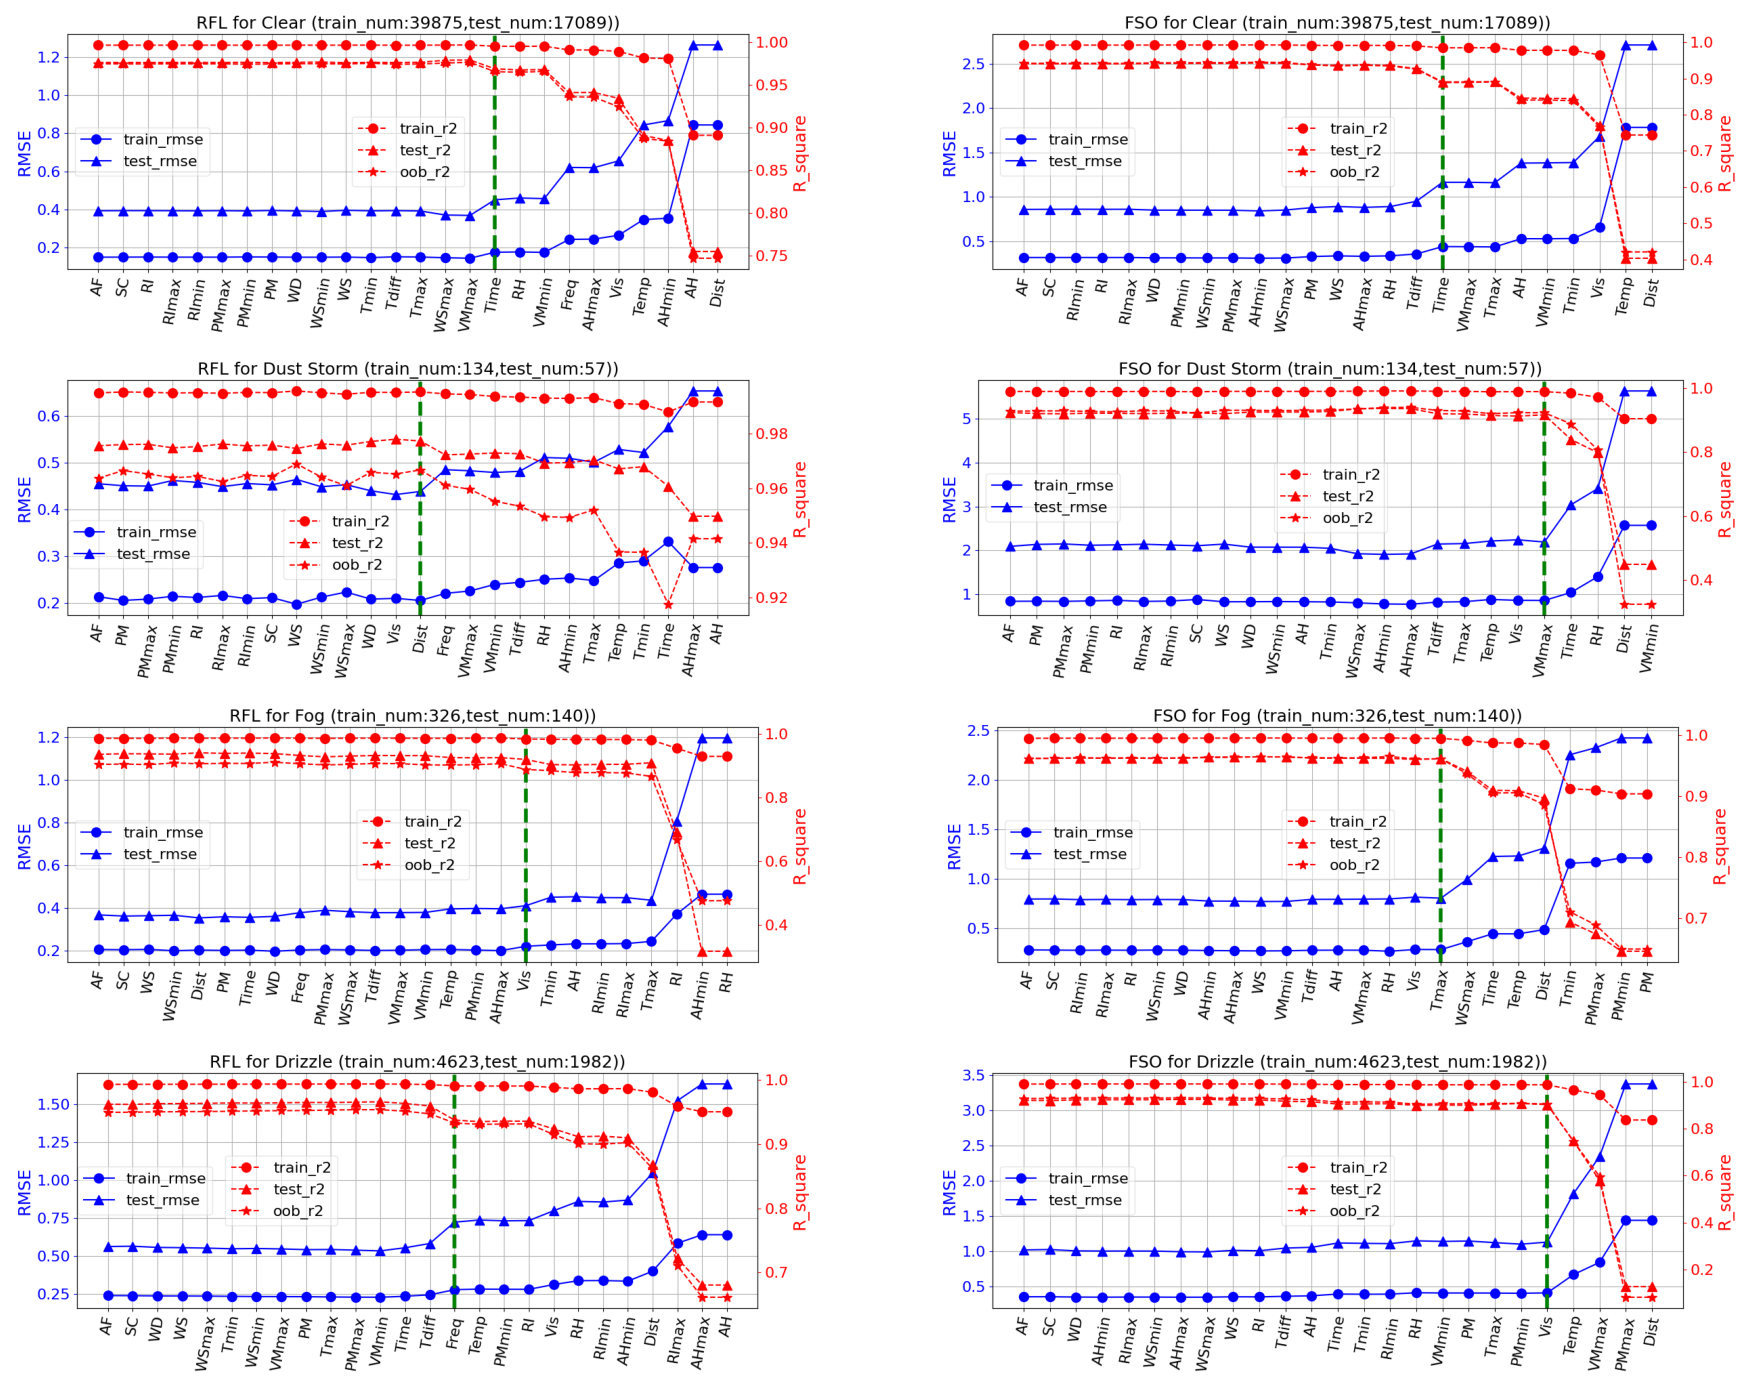

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 14))  

ax1 = fig.add_subplot(4, 2, 1)
ax1.imshow(fig0_1.canvas.renderer.buffer_rgba(), extent=[0, fig0_1.canvas.renderer.width, 0, fig0_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax1.set_axis_off()  # Turn off the axes of the first subplot.

ax2 = fig.add_subplot(4, 2, 2)
ax2.imshow(fig0_2.canvas.renderer.buffer_rgba(), extent=[0, fig0_2.canvas.renderer.width, 0, fig0_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax2.set_axis_off()

ax3 = fig.add_subplot(4, 2, 3)
ax3.imshow(fig3_1.canvas.renderer.buffer_rgba(), extent=[0, fig3_1.canvas.renderer.width, 0, fig3_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax3.set_axis_off()  

ax4 = fig.add_subplot(4, 2, 4)
ax4.imshow(fig3_2.canvas.renderer.buffer_rgba(), extent=[0, fig3_2.canvas.renderer.width, 0, fig3_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax4.set_axis_off()  

ax5 = fig.add_subplot(4, 2, 5)
ax5.imshow(fig4_1.canvas.renderer.buffer_rgba(), extent=[0, fig4_1.canvas.renderer.width, 0, fig4_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax5.set_axis_off()

ax6 = fig.add_subplot(4, 2, 6)
ax6.imshow(fig4_2.canvas.renderer.buffer_rgba(), extent=[0, fig4_2.canvas.renderer.width, 0, fig4_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax6.set_axis_off() 

ax7 = fig.add_subplot(4, 2, 7)
ax7.imshow(fig5_1.canvas.renderer.buffer_rgba(), extent=[0, fig5_1.canvas.renderer.width, 0, fig5_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax7.set_axis_off()

ax8 = fig.add_subplot(4, 2, 8)
ax8.imshow(fig5_2.canvas.renderer.buffer_rgba(), extent=[0, fig5_2.canvas.renderer.width, 0, fig5_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax8.set_axis_off()
plt.tight_layout()
plt.show()


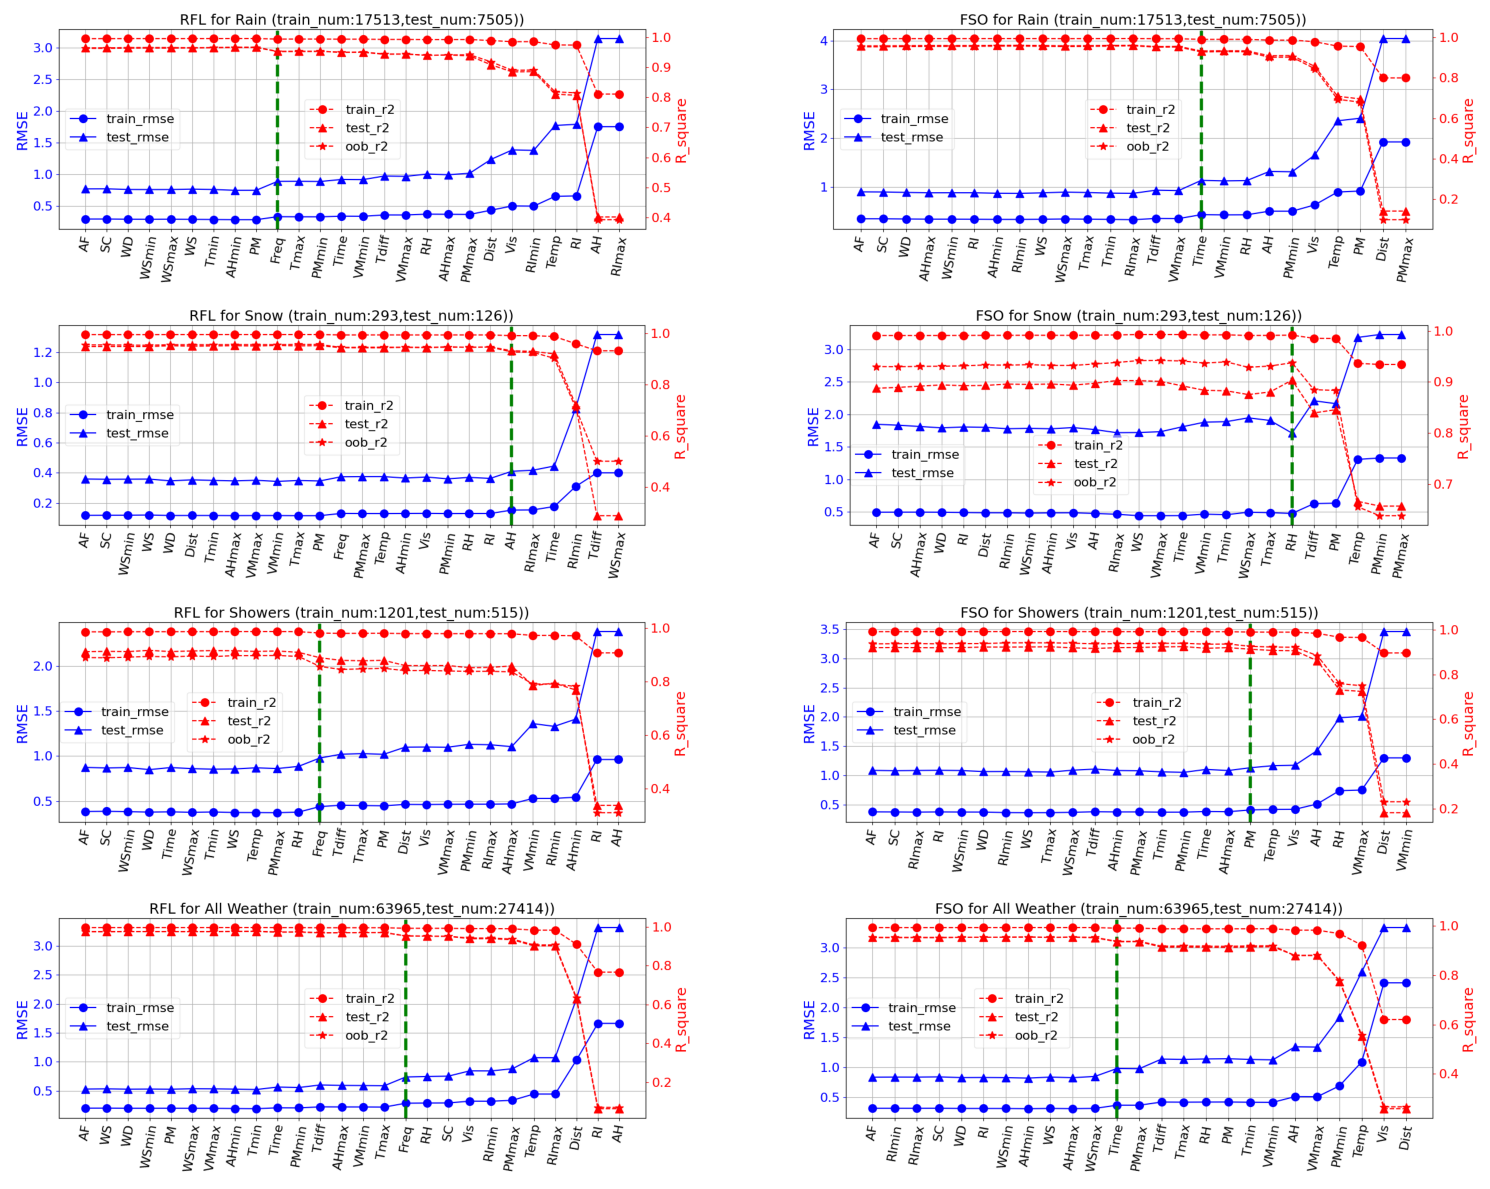

In [8]:


fig = plt.figure(figsize=(17, 12))  

ax1 = fig.add_subplot(4, 2, 1)
ax1.imshow(fig6_1.canvas.renderer.buffer_rgba(), extent=[0, fig6_1.canvas.renderer.width, 0, fig6_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax1.set_axis_off() 

ax2 = fig.add_subplot(4, 2, 2)
ax2.imshow(fig6_2.canvas.renderer.buffer_rgba(), extent=[0, fig6_2.canvas.renderer.width, 0, fig6_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax2.set_axis_off() 

ax3 = fig.add_subplot(4, 2, 3)
ax3.imshow(fig7_1.canvas.renderer.buffer_rgba(), extent=[0, fig7_1.canvas.renderer.width, 0, fig7_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax3.set_axis_off() 

ax4 = fig.add_subplot(4, 2, 4)
ax4.imshow(fig7_2.canvas.renderer.buffer_rgba(), extent=[0, fig7_2.canvas.renderer.width, 0, fig7_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax4.set_axis_off()  

ax5 = fig.add_subplot(4, 2, 5)
ax5.imshow(fig8_1.canvas.renderer.buffer_rgba(), extent=[0, fig8_1.canvas.renderer.width, 0, fig8_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax5.set_axis_off() 

ax6 = fig.add_subplot(4, 2, 6)
ax6.imshow(fig8_2.canvas.renderer.buffer_rgba(), extent=[0, fig8_2.canvas.renderer.width, 0, fig8_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax6.set_axis_off() 

ax7 = fig.add_subplot(4, 2, 7)
ax7.imshow(figa_1.canvas.renderer.buffer_rgba(), extent=[0, figa_1.canvas.renderer.width, 0, figa_1.canvas.renderer.height])  # 显示 fig8_1 到第一个子图上，并保持原图分辨率
ax7.set_axis_off()  

ax8 = fig.add_subplot(4, 2, 8)
ax8.imshow(figa_2.canvas.renderer.buffer_rgba(), extent=[0, figa_2.canvas.renderer.width, 0, figa_2.canvas.renderer.height])  # 显示 fig8_2 到第二个子图上，并保持原图分辨率
ax8.set_axis_off()  
plt.tight_layout()
plt.show()

# the importance predictor in different specific model

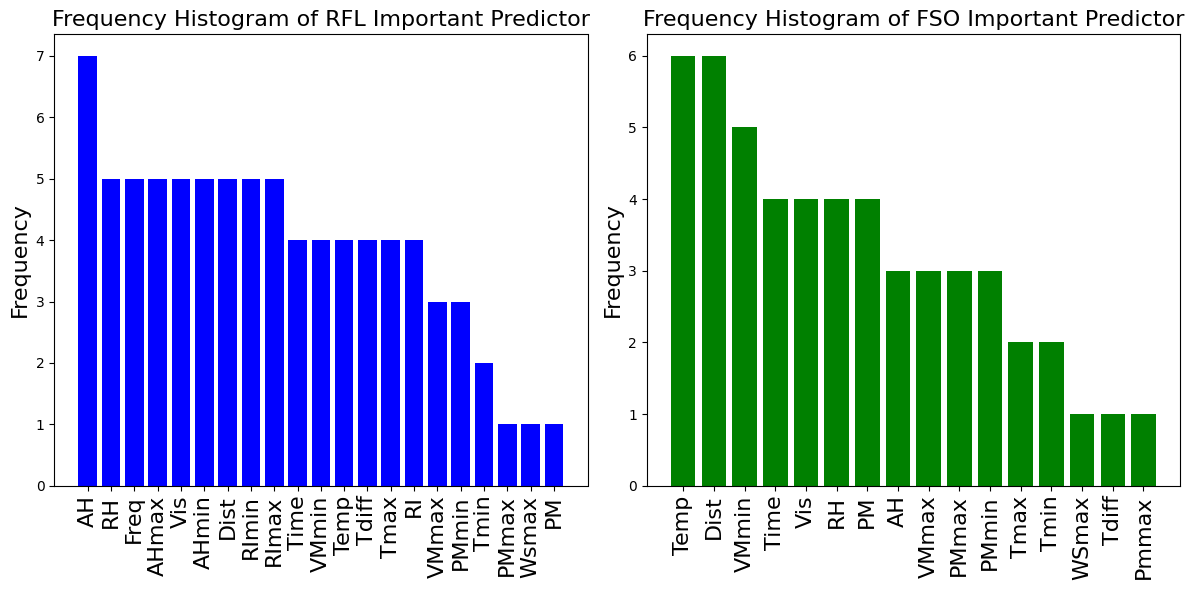

In [24]:
RFL_Clear = ['Time','RH','VMmin','Freq', 'AHmax', 'Vis','Temp', 'AHmin', 'AH','Dist']
RFL_Dust = ['Dist','Freq','VMmax','VMmin','Tdiff','RH', 'AHmin',"Tmax",'Temp', 'Tmin','Time','AHmax','AH']
RFL_Fog = ['Vis','Tmin','AH','RImin','RImax','Tmax', 'RI', 'AHmin', 'RH']
RFL_Drizzle= ['Freq', 'Temp', 'PMmin', 'RI','Vis', 'RH', 'RImin','AHmin','Dist', 'RImax', 'AHmax', 'AH']
RFL_Rain = ['Freq','Tmax','PMmin','Time','VMmin','Tdiff','VMmax','RH','AHmax','PMmax','Dist','Vis','RImin','Temp','RI','AH','RImax']
RFL_Snow = ['AH','RImax','Time','RImin','Tdiff','Wsmax']
RFL_Showers = ['Freq','Tdiff','Tmax','PM','Dist','Vis','VMmax','PMmin','RImax','AHmax','VMmin','RImin','AHmin','RI','AH']
RFL_All = ['Freq','RH','SC','Vis','RImin','PMmax','Temp','RImax','Dist','RI','AH']

FSO_Clear = ['Time','VMmin','Tmax','AH','VMmin','Tmin','Vis','Temp','Dist']
FSO_Dust = ['VMmax', 'Time',"RH",'Dist', 'VMmin']
FSO_Fog = ['Tmax', 'WSmax', 'Time', 'Temp','Dist', 'Tmin',"PMmax",'PMmin', 'PM']
FSO_Drizzle= ['Vis', 'Temp', 'VMmax', 'PMmax','Dist']
FSO_Rain = ['Time','VMmin','RH','AH','PMmin','Vis','Temp','PM','Dist','PMmax']
FSO_Snow = ['RH','Tdiff','PM','Temp','PMmin','Pmmax']
FSO_Showers = ['PM','Temp','Vis','AH','RH','VMmax','Dist','VMmin']
FSO_All = ['Time','PMmax','Tdiff','Tmax','RH','Tmin','VMmin','AH','VMmax','PMmin','Temp','Vis','Dist']

import matplotlib.pyplot as plt
from collections import Counter
# Merge all the lists
RFL_all_lists = RFL_Clear + RFL_Dust + RFL_Fog + RFL_Drizzle + RFL_Rain + RFL_Snow + RFL_Showers
FSO_all_lists = FSO_Clear + FSO_Dust + FSO_Fog + FSO_Drizzle + FSO_Rain + FSO_Snow + FSO_Showers
# Count the occurrences using Counter
RFL_word_counts = Counter(RFL_all_lists)
FSO_word_counts = Counter(FSO_all_lists)

# Sort words and their frequencies by frequency
RFL_sorted_words = [word for word, _ in sorted(RFL_word_counts.items(), key=lambda item: item[1], reverse=True)]
RFL_sorted_counts = [count for _, count in sorted(RFL_word_counts.items(), key=lambda item: item[1], reverse=True)]

FSO_sorted_words = [word for word, _ in sorted(FSO_word_counts.items(), key=lambda item: item[1], reverse=True)]
FSO_sorted_counts = [count for _, count in sorted(FSO_word_counts.items(), key=lambda item: item[1], reverse=True)]


# Plotting the histograms in a single subplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(RFL_sorted_words, RFL_sorted_counts, color='blue')

plt.ylabel('Frequency',fontsize = 16)
plt.title('Frequency Histogram of RFL Important Predictor',fontsize = 16)
plt.xticks(rotation=90,fontsize = 16)  # Rotate x-axis labels to avoid overlap

plt.subplot(1, 2, 2)
plt.bar(FSO_sorted_words, FSO_sorted_counts, color='green')

plt.ylabel('Frequency',fontsize = 16)
plt.title('Frequency Histogram of FSO Important Predictor',fontsize = 16)
plt.xticks(rotation=90,fontsize = 16)  # Rotate x-axis labels to avoid overlap

plt.tight_layout()  # Automatically adjust layout to prevent labels from being clipped
plt.show()


'All Features': 'AF',
    'WindDirection': 'WD',
    'WindSpeed': 'WS',
    'WindSpeedMin': 'WSmin',
    'ParticulateMin': 'PMmin',
    'WindSpeedMax': 'WSmax',
    'TemperatureMin': 'Tmin',
    'TemperatureMax': 'Tmax',
    'Particulate': 'PM',
    'VisibilityMin': 'VMmin',
    'AbsoluteHumidityMax': 'AHmax',
    'TemperatureDifference': 'Tdiff',
    'AbsoluteHumidityMin': 'AHmin',
    'Time': 'Time',
    'VisibilityMax': 'VMmax',
    'Frequency': 'Freq',
    'RelativeHumidity': 'RH',
    'ParticulateMax': 'PMmax',
    'Visibility': 'Vis',
    'SYNOPCode': 'SC',
    'Temperature': 'Temp',
    'RainIntensityMin': 'RImin',
    'RainIntensityMax': 'RImax',
    'Distance': 'Dist',
    'RainIntensity': 'RI',
    'AbsoluteHumidity': 'AH'
}

In [25]:
data = pd.read_csv("data_pre_process.csv")

Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
    ModelFunctions.split_data1(data, "FSO_Att",drop_column = ["Frequency",'RFL_Att']) # Frequency doesn't relate to FSO_Att

Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
    ModelFunctions.split_data1(data, "RFL_Att",drop_column = ['FSO_Att'])
rfl_rf_model = RandomForestRegressor(n_estimators=120, max_depth=32, \
                                        min_samples_leaf=1, random_state=25,\
                                        min_samples_split=2, oob_score=True, n_jobs=6)
fso_rf_model = RandomForestRegressor(n_estimators = 150, max_depth=34, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )
RFL_extractF = ['Frequency','RelativeHumidity','SYNOPCode',"Visibility","RainIntensityMin","ParticulateMax","Temperature","RainIntensityMax","Distance","RainIntensity","AbsoluteHumidity"]
FSO_extractF = ['Time','ParticulateMax','TemperatureDifference','TemperatureMax','RelativeHumidity','Particulate','TemperatureMin',"VisibilityMin","AbsoluteHumidity","VisibilityMax","ParticulateMin","Temperature","Visibility","Distance"]


#######  FSO_Att Data Set  ######
FSO_Att Training set feature count: (63965, 24)
FSO_Att Validation set feature count: (27414, 24)
FSO_Att Training set label count: (63965,)
FSO_Att Validation set label count: (27414,)
#######  RFL_Att Data Set  ######
RFL_Att Training set feature count: (63965, 25)
RFL_Att Validation set feature count: (27414, 25)
RFL_Att Training set label count: (63965,)
RFL_Att Validation set label count: (27414,)


In [11]:
Xtrain_rfl[RFL_extractF]

Frequency  RelativeHumidity  SYNOPCode    Visibility  \
44267  73500000000         85.199859          6  36849.945820   
78963  73500000000         93.131970          6   5044.212825   
75402  83500000000         72.199418          0  57228.456020   
31903  73500000000         97.692536          6   6492.565230   
50396  83500000000         98.394494          6  11468.150660   
...            ...               ...        ...           ...   
52698  83500000000         81.415451          0  21993.629420   
71016  83500000000         60.618560          0  61679.791040   
72695  73500000000         77.319774          0  75000.838750   
45460  83500000000         60.065906          0  24232.561770   
29796  83500000000         87.118228          0  31611.687440   

       RainIntensityMin  ParticulateMax  Temperature  RainIntensityMax  \
44267          0.000960        7.352813     6.384740          0.001017   
78963          3.818138      163.612728     4.929359          4.424694   
75402          0.000000        0.000000     4.098760          0.000000   
31903          0.911012      170.526919     8.836223          1.010998   
50396          0.186549       40.109448    11.857805          0.206831   
...                 ...             ...          ...               ...   
52698          0.000000        0.000000     5.277045          0.000000   
71016          0.000000        0.000000     5.345034          0.000000   
72695          0.000000        0.000000     4.526172          0.000000   
45460          0.000000        0.000000     6.728601          0.000000   
29796          0.000000        0.000000     5.379582          0.000000   

          Distance  RainIntensity  AbsoluteHumidity  
44267  2015.927440       0.001007          6.341638  
78963  4826.041671       4.159341          6.299707  
75402  4823.842601       0.000000          4.621915  
31903  2012.633885       0.995433          8.520809  
50396  2014.672504       0.203934         10.389290  
...            ...            ...               ...  
52698  4819.215105       0.000000          5.635052  
71016  4827.212336       0.000000          4.214469  
72695  4822.696178       0.000000          5.092313  
45460  2013.349168       0.000000          4.572279  
29796  2020.514447       0.000000          6.070644  

[63965 rows x 11 columns]

# Predict attenuation in different weather condition use generic model

In [27]:
synop_codes = [0, 3, 4, 5, 6, 7, 8]
for code in [9]:  # 9 is the 70% train and 30% test
    Xtrain_rfl_s, Ytrain_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_fso, Yval_fso, code)

rfl_rf_model.fit(Xtrain_rfl_s[RFL_extractF], Ytrain_rfl_s)
fso_rf_model.fit(Xtrain_fso_s[FSO_extractF], Ytrain_fso_s)


RandomForestRegressor(max_depth=34, n_estimators=150, n_jobs=6, oob_score=True,
                      random_state=25)

In [28]:
RFL_generic_rmse_list = []
RFL_generic_r2_list = []
FSO_generic_rmse_list = []
FSO_generic_r2_list = []

for code in synop_codes:
    Xtrain_rfl_s, Ytrain_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_fso, Yval_fso, code)

    train_rmse, train_r2,val_rmse,val_r2,oob_r2= \
            ModelFunctions.caculate_mrtrics(rfl_rf_model,Xtrain_rfl_s[RFL_extractF],Ytrain_rfl_s,Xval_rfl_s[RFL_extractF],Yval_rfl_s,oob = True)
    
    RFL_generic_rmse_list.append(val_rmse)
    RFL_generic_r2_list.append(val_r2)
    print('$$$$$$$$$$$$$$$$$$$$$$')
    print(RFL_generic_rmse_list)
    train_rmse, train_r2,val_rmse,val_r2,oob_r2= \
            ModelFunctions.caculate_mrtrics(fso_rf_model,Xtrain_fso_s[FSO_extractF],Ytrain_fso_s,Xval_fso_s[FSO_extractF],Yval_fso_s,oob = True)
   
    FSO_generic_rmse_list.append(val_rmse)
    FSO_generic_r2_list.append(val_r2)

c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 0.16493800397621572
Validation RMSE: 0.4318607085566725
Train R²: 0.9958395111769578
Validation R²: 0.9714162205969906
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training RMSE: 0.3069045609200046
Validation RMSE: 0.8213147708315001
Train R²: 0.9924146638283933
Validation R²: 0.9453902840996079
OOB R²: 0.9545869592100359
Training RMSE: 0.29890439031345223
Validation RMSE: 0.2722508529317237
Train R²: 0.9902851486031795
Validation R²: 0.9912929129173019
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training RMSE: 0.5035391273431162
Validation RMSE: 1.299954619739968
Train R²: 0.9963380000950662
Validation R²: 0.9706387050753099
OOB R²: 0.9545869592100359
Training RMSE: 0.16773073707480723
Validation RMSE: 0.3262076305859088
Train R²: 0.9907952369504756
Validation R²: 0.9493929599918448
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237, 0.3262076305859088]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training RMSE: 0.2794903077246739
Validation RMSE: 0.8394765457074316
Train R²: 0.9948450320064304
Validation R²: 0.9574449477497405
OOB R²: 0.9545869592100359
Training RMSE: 0.19934717549132663
Validation RMSE: 0.48788698651816503
Train R²: 0.995191923308119
Validation R²: 0.9715460271195985
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237, 0.3262076305859088, 0.48788698651816503]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 0.2945350247978394
Validation RMSE: 0.8335597793444116
Train R²: 0.9931641098988101
Validation R²: 0.9468266549919548
OOB R²: 0.9545869592100359


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 0.29874075904088815
Validation RMSE: 0.7877370654402811
Train R²: 0.994502427376904
Validation R²: 0.9625625669589877
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237, 0.3262076305859088, 0.48788698651816503, 0.7877370654402811]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training RMSE: 0.31222571539476957
Validation RMSE: 0.8349156647519127
Train R²: 0.9946997708822433
Validation R²: 0.9633649137913335
OOB R²: 0.9545869592100359
Training RMSE: 0.15025609785499874
Validation RMSE: 0.4495515060538788
Train R²: 0.9902269158382999
Validation R²: 0.9170106300917378
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237, 0.3262076305859088, 0.48788698651816503, 0.7877370654402811, 0.4495515060538788]


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Training RMSE: 0.39506845962721115
Validation RMSE: 1.5837553841385026
Train R²: 0.9941958867070794
Validation R²: 0.9174924246482133
OOB R²: 0.9545869592100359
Training RMSE: 0.29110874835226735
Validation RMSE: 0.782363582500075
Train R²: 0.9914012266871353
Validation R²: 0.9284088387992566
OOB R²: 0.9716060704701653
$$$$$$$$$$$$$$$$$$$$$$
[0.4318607085566725, 0.2722508529317237, 0.3262076305859088, 0.48788698651816503, 0.7877370654402811, 0.4495515060538788, 0.782363582500075]
Training RMSE: 0.33934812542347587
Validation RMSE: 1.04353075442693
Train R²: 0.9929235840845059
Validation R²: 0.925674674489506
OOB R²: 0.9545869592100359


c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nining\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


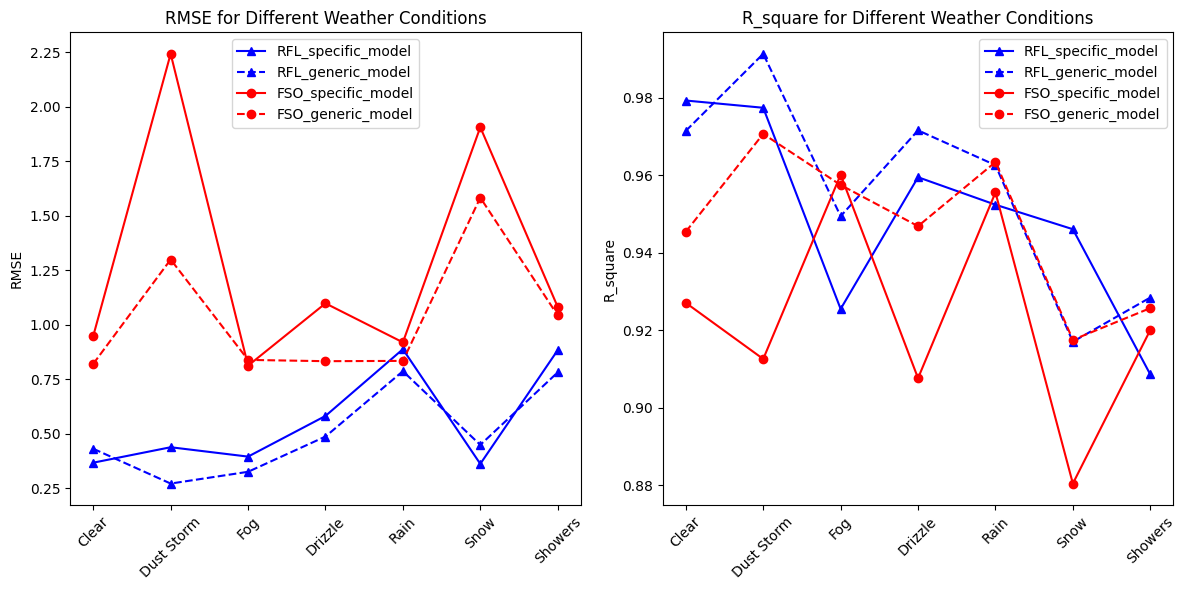

In [29]:
weather_list = ["Clear","Dust Storm","Fog","Drizzle","Rain","Snow","Showers"]

# Create the first subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(weather_list, RFL_specific_rmse_list, color='b', marker='^', label='RFL_specific_model')
plt.plot(weather_list, RFL_generic_rmse_list, color='b', marker='^', linestyle='--', label='RFL_generic_model')
plt.plot(weather_list, FSO_specific_rmse_list, color='r', marker='o', label='FSO_specific_model')
plt.plot(weather_list, FSO_generic_rmse_list, color='r', marker='o', linestyle='--', label='FSO_generic_model')

# Add labels and title
plt.ylabel('RMSE')
plt.title('RMSE for Different Weather Conditions')
plt.xticks(rotation=45)
plt.legend()

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(weather_list, RFL_specific_r2_list, color='b', marker='^', label='RFL_specific_model')
plt.plot(weather_list, RFL_generic_r2_list, color='b', marker='^', linestyle='--', label='RFL_generic_model')
plt.plot(weather_list, FSO_specific_r2_list, color='r', marker='o', label='FSO_specific_model')
plt.plot(weather_list, FSO_generic_r2_list, color='r', marker='o', linestyle='--', label='FSO_generic_model')

# Add labels and title
plt.ylabel('R_square')
plt.title('R_square for Different Weather Conditions')
plt.xticks(rotation=45)
plt.legend() 

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# compare with true values and predicted values wiht Generic model

In [ ]:
for code in synop_codes:
    Xtrain_rfl_s, Ytrain_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_fso, Yval_fso, code)

    rfl_predictions = rfl_rf_model.predict(Xval_rfl_s[RFL_extractF])
    fso_predictions = fso_rf_model.predict(Xval_fso_s[FSO_extractF])
    
    rfl_true = Yval_rfl_s
    fso_true = Yval_fso_s



    

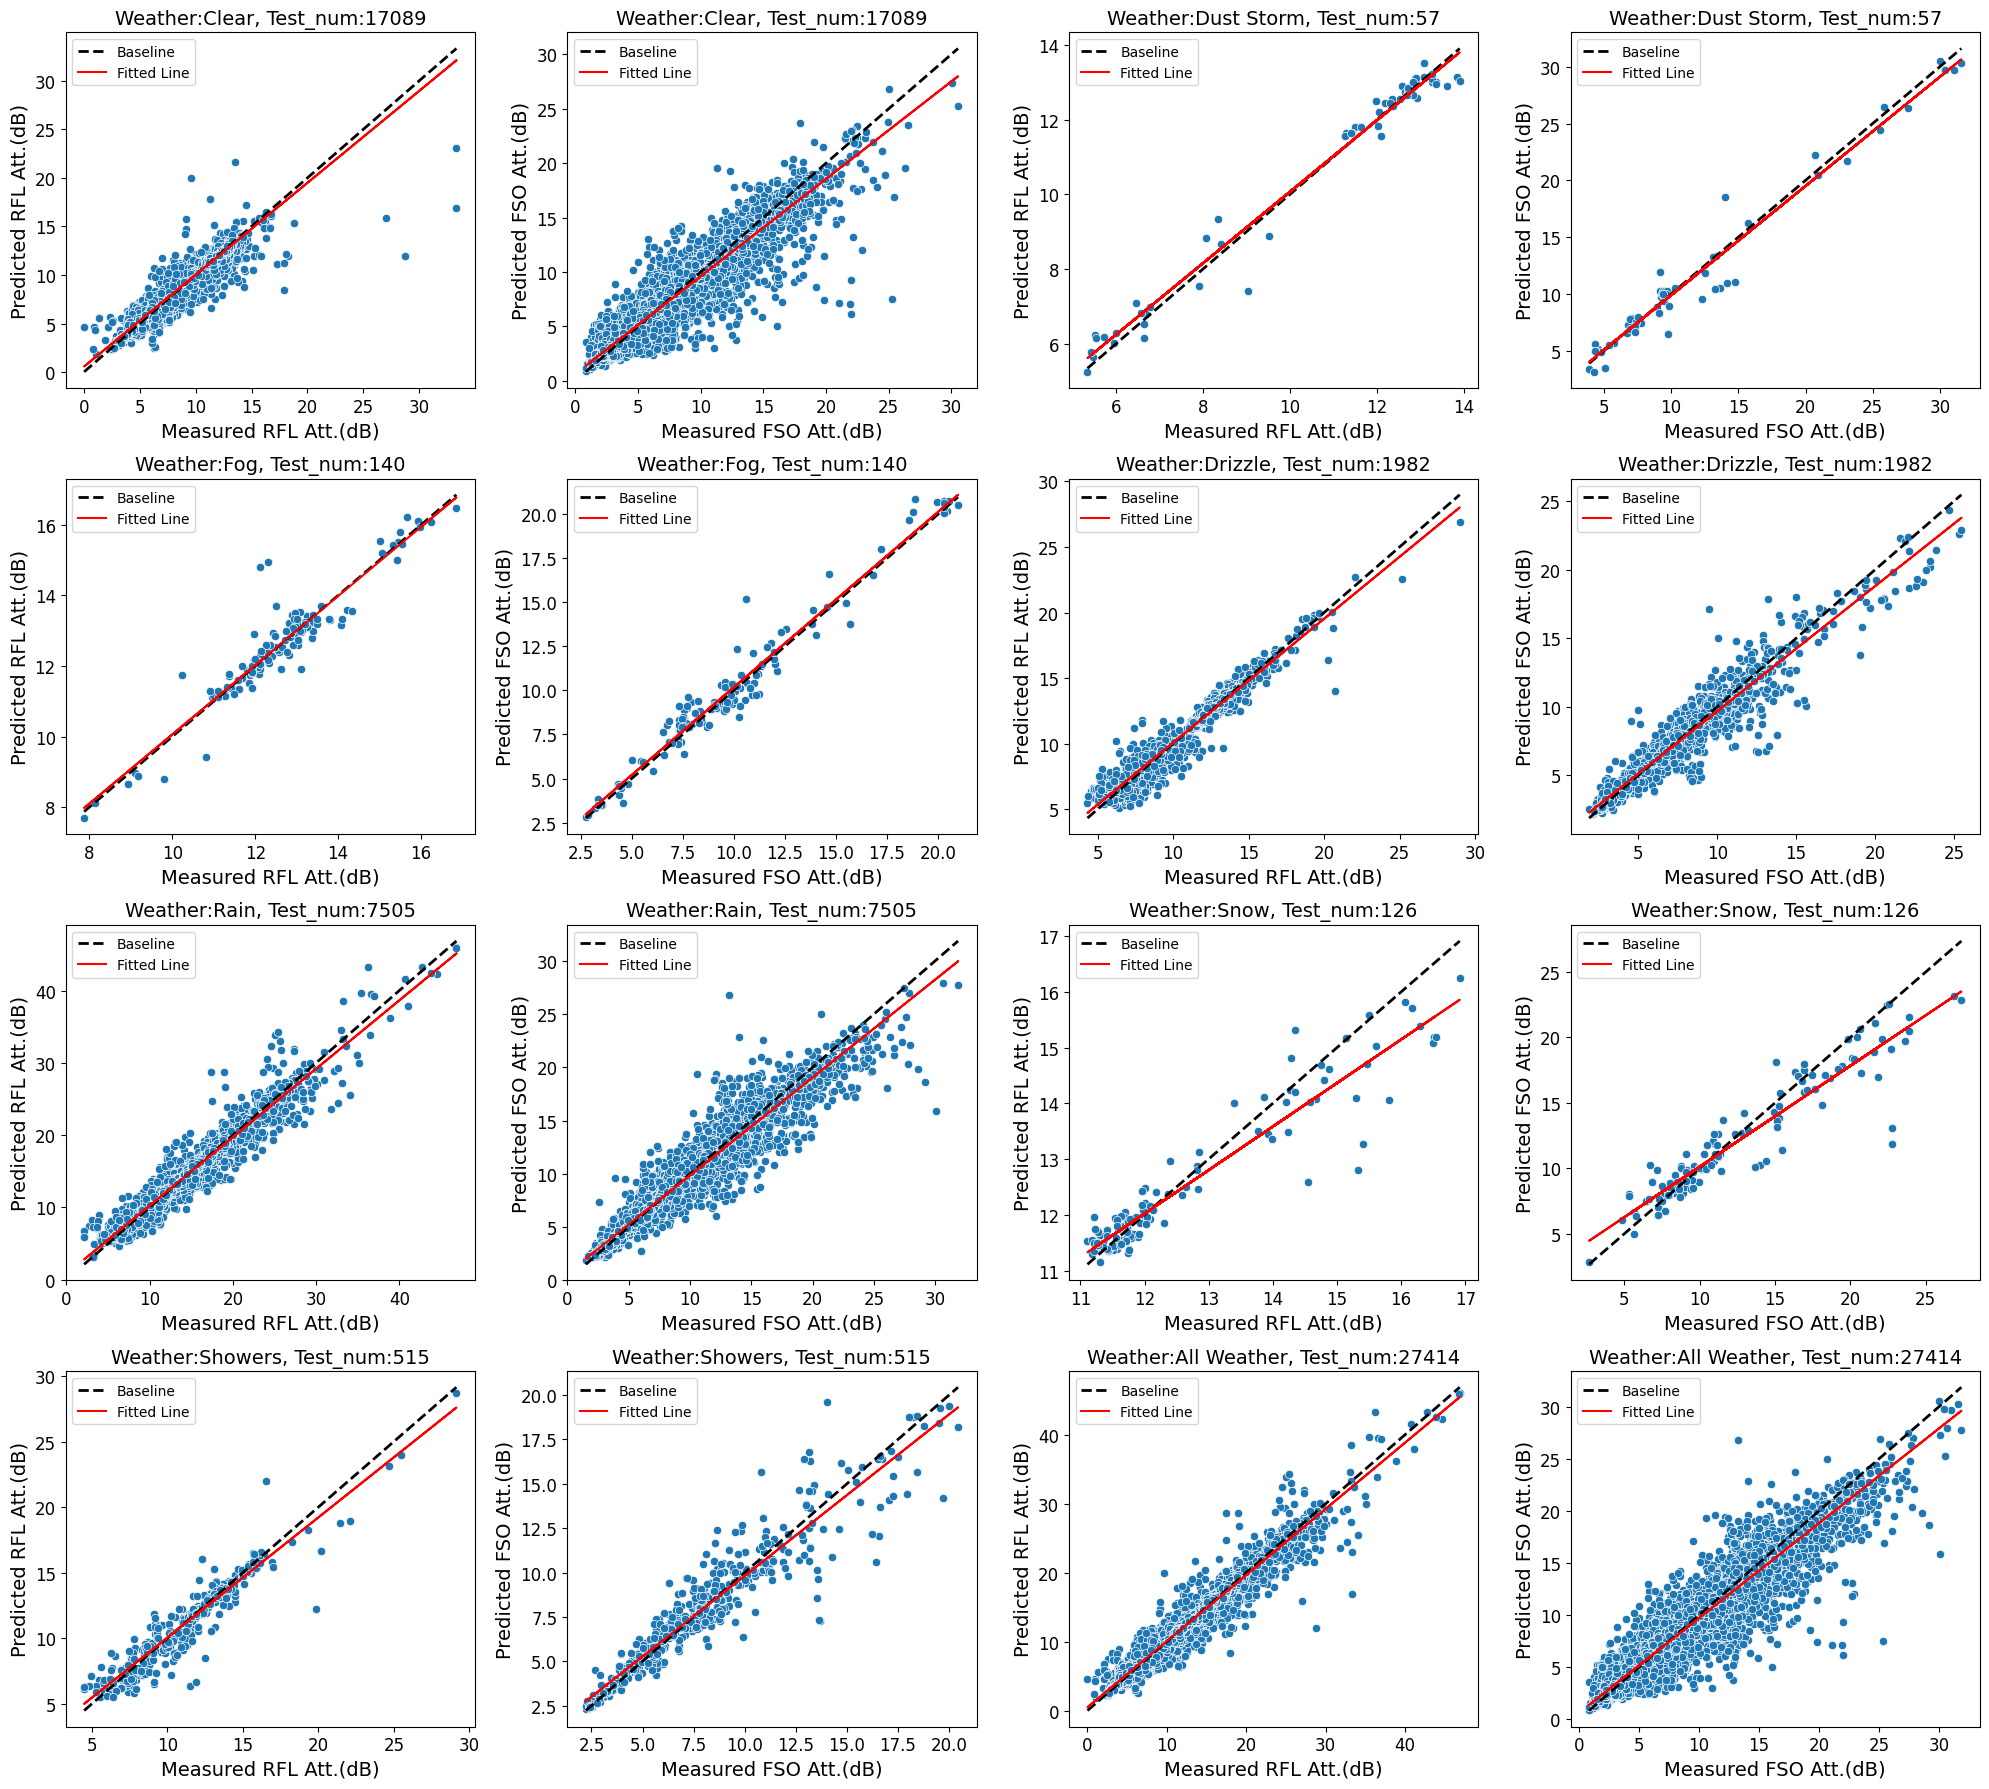

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
synop_codes = [0,3,4,5,6,7,8,9]
# Create a figure
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed

# Counter for loop
count = 1

# Iterate over synop_codes list
for code in synop_codes:
    # Filter data
    Xtrain_rfl_s, Ytrain_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_rfl, Ytrain_rfl, code)
    Xval_rfl_s, Yval_rfl_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_rfl, Yval_rfl, code)
    Xtrain_fso_s, Ytrain_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xtrain_fso, Ytrain_fso, code)
    Xval_fso_s, Yval_fso_s = ModelFunctions.filter_data_by_SYNOPCode(Xval_fso, Yval_fso, code)

    # Predictions using the model
    rfl_predictions = rfl_rf_model.predict(Xval_rfl_s[RFL_extractF])
    fso_predictions = fso_rf_model.predict(Xval_fso_s[FSO_extractF])
    
    # True values
    rfl_true = Yval_rfl_s
    fso_true = Yval_fso_s
    if code == 0:
        weather = "Clear"
        train_num = 39875
        test_num = 17089
    elif code == 3:
        weather = "Dust Storm"
        train_num = 134 
        test_num = 57
    elif code == 4:
        weather = "Fog"
        train_num = 326 
        test_num = 140
    elif code == 5:
        weather = "Drizzle"
        train_num = 4623 
        test_num = 1982
    elif code == 6:
        weather = "Rain"
        train_num = 17513 
        test_num = 7505
    elif code == 7:
        weather = "Snow"
        train_num = 293 
        test_num = 126
    elif code == 8:
        weather = "Showers"
        train_num = 1201 
        test_num = 515
    else:
        weather = "All Weather"
        train_num = 63965 
        test_num = 27414

    # Create subplots in the loop
    plt.subplot(len(synop_codes)//2, 4, count)
    sns.scatterplot(x=rfl_true, y=rfl_predictions)
    plt.plot([rfl_true.min(), rfl_true.max()], [rfl_true.min(), rfl_true.max()], 'k--', lw=2,label='Baseline') # Plot y=x line
    slope, intercept = np.polyfit(rfl_true, rfl_predictions, 1) # Linear regression line
    plt.plot(rfl_true, slope*rfl_true + intercept, color='r', label='Fitted Line') # Plot linear regression line
    plt.title(f'Weather:{weather}, Test_num:{test_num}',fontsize=14)
    plt.xlabel('Measured RFL Att.(dB)',fontsize=14)
    plt.ylabel('Predicted RFL Att.(dB)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend() # Show legend
    # Increment counter
    count += 1

    plt.subplot(len(synop_codes)//2, 4, count)
    sns.scatterplot(x=fso_true, y=fso_predictions)
    plt.plot([fso_true.min(), fso_true.max()], [fso_true.min(), fso_true.max()], 'k--', lw=2, label='Baseline') # Plot y=x line
    slope, intercept = np.polyfit(fso_true, fso_predictions, 1) # Linear regression line
    plt.plot(fso_true, slope*fso_true + intercept, color='r', label='Fitted Line') # Plot linear regression line
    plt.title(f'Weather:{weather}, Test_num:{test_num}',fontsize=14)
    plt.xlabel('Measured FSO Att.(dB)',fontsize=14)
    plt.ylabel('Predicted FSO Att.(dB)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend() # Show legend

    # Increment counter
    count += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
